In [137]:
from dataset_cityscapes import *
import matplotlib.pyplot as plt

palette = [128, 64, 128, 244, 35, 232, 70, 70, 70, 102, 102, 156, 190, 153, 153,
           153, 153, 153, 250, 170, 30,
           220, 220, 0, 107, 142, 35, 152, 251, 152, 70, 130, 180, 220, 20, 60,
           255, 0, 0, 0, 0, 142, 0, 0, 70,
           0, 60, 100, 0, 80, 100, 0, 0, 230, 119, 11, 32]
zero_pad = 256 * 3 - len(palette)
for i in range(zero_pad):
    palette.append(0)


transform = A.Compose(
    [
        # A.SmallestMaxSize(max_size=160),
        # A.CenterCrop(height=128, width=128),
        A.Resize(256, 512),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)


def colorize_mask(mask):
    """
    Colorize a segmentation mask.
    """
    # mask: numpy array of the mask
    new_mask = Image.fromarray(mask.astype(np.uint8)).convert('P')
    new_mask.putpalette(palette)
    return new_mask

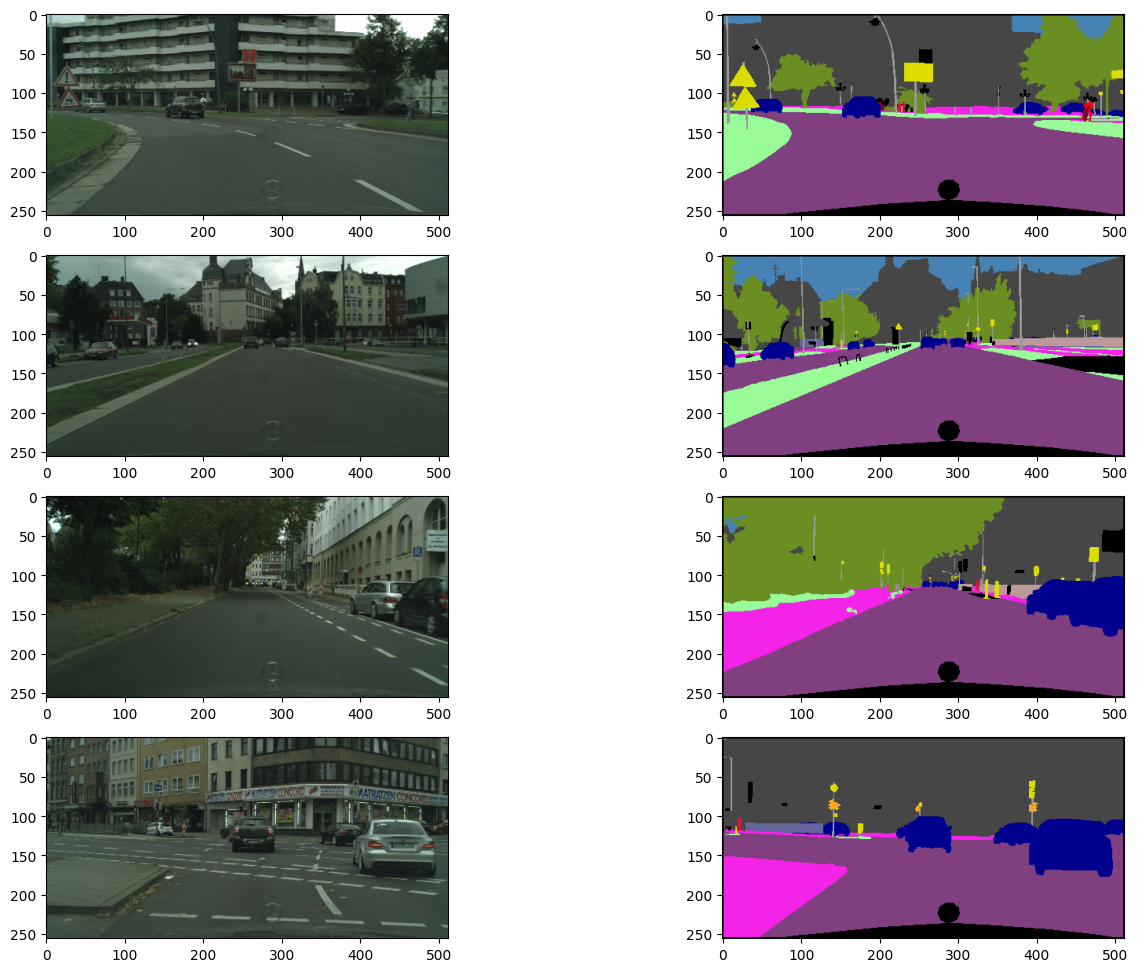

In [109]:
batch_size = 4

custom_dataset = CityScapes(root_dir='./cityscapes', split='train', transform=transform)
dataloader_train = DataLoader(custom_dataset, batch_size=batch_size, shuffle=None)


def denormalize(img):
    mean, std =(0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

    return (img * std) + mean



for (data, target) in dataloader_train:
    images, masks = data.numpy().transpose((0, 2, 3, 1)), target.numpy()
    fig, ax = plt.subplots(ncols=2, nrows=batch_size, figsize=(16, 12))

    for row in range(batch_size):
        ax[row][0].imshow(denormalize(images[row]))
        ax[row][1].imshow(colorize_mask(masks[row]))
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


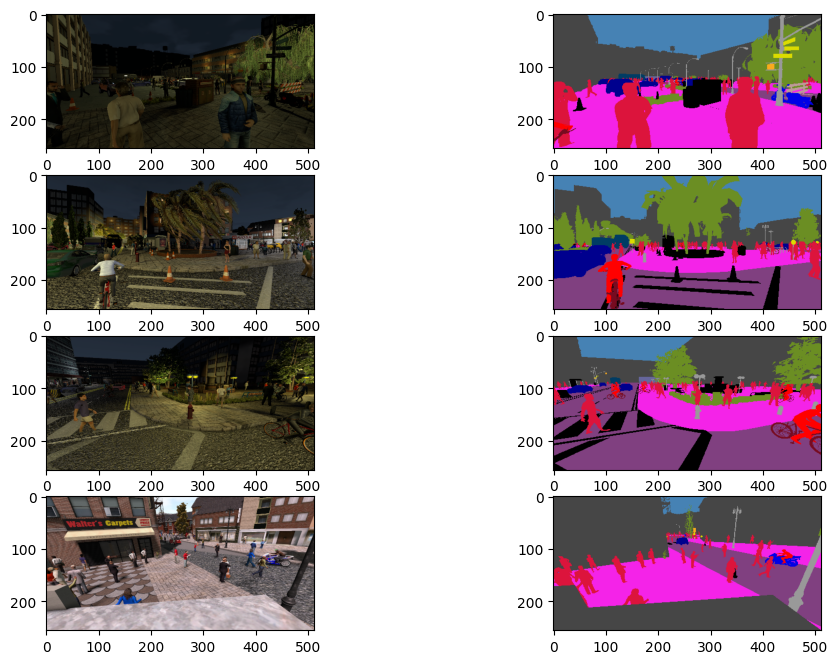

In [61]:
from dataset_synthia import *

batch_size = 4

custom_dataset = Synthia(root_dir='./synthia', split='train', transform=transform)
dataloader_train = DataLoader(custom_dataset, batch_size=batch_size, shuffle=None)


def denormalize(img):
    mean, std =(0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

    return (img * std) + mean



for (data, target) in dataloader_train:
    images, masks = data.numpy().transpose((0, 2, 3, 1)), target.numpy()
    fig, ax = plt.subplots(ncols=2, nrows=batch_size, figsize=(12, 8))

    for row in range(batch_size):
        ax[row][0].imshow(denormalize(images[row]))
        ax[row][1].imshow(colorize_mask(masks[row]))
    break

Text(0.5, 1.0, 'Fine-Tuning DeepLabV3 on Cityscapes')

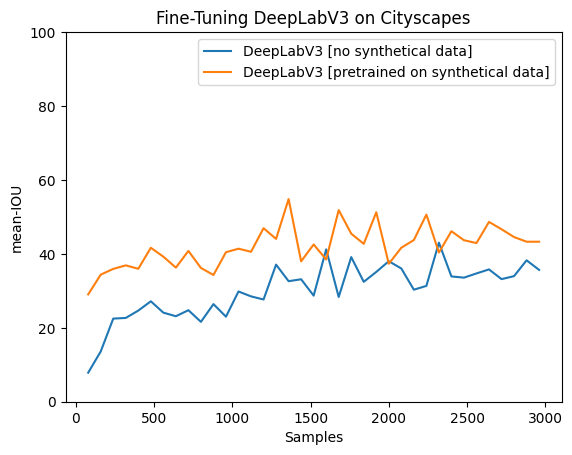

In [134]:
import matplotlib.pyplot as plt


x = [i for i in range(80, (37 + 1) * 80, 80)] 
mean_iou_no_pre = [7.86, 13.60, 22.49, 22.67, 24.66, 27.17, 24.10, 23.13, 24.76, 21.61, 26.41, 23.01, 29.83, 28.50, 27.66, 37.09, 32.61, 33.13, 28.7, 41.22, 28.34, 39.13, 32.44, 35.12, 38.02,
           36.04, 30.31, 31.34, 43.03, 33.90, 33.57, 34.71, 35.80, 33.17, 33.98, 38.26, 35.67]

mean_iou = [29.04, 34.38, 35.94, 36.89, 35.97, 41.65, 39.25, 36.28, 40.80, 36.19, 34.29, 40.46, 41.40, 40.57, 46.95, 44.05, 54.83, 37.99, 42.55, 38.49, 51.85, 45.47, 42.72, 51.26,
            37.32, 41.67, 43.74, 50.62, 40.37, 46.13, 43.69, 42.93, 48.65, 46.66, 44.55, 43.29, 43.29]

plt.xlabel('Samples')
plt.ylabel('mean-IOU')

plt.plot(x, mean_iou_no_pre, x, mean_iou)
plt.gca().legend(('DeepLabV3 [no synthetical data]','DeepLabV3 [pretrained on synthetical data]'))


plt.ylim(0, 100)
plt.title('Fine-Tuning DeepLabV3 on Cityscapes')


In [7]:
# testing the synthia-dataset
from cityscapes import *
from synthia import *


In [8]:
synthia_dataset = Synthia(root_dir='./synthia', transform=transform)
train_size = int(0.9 * len(synthia_dataset))
val_size = int(len(synthia_dataset) - train_size)
print(val_size)

940


In [53]:
from cityscapes import *
from synthia import *
import glob
from PIL import Image
import imageio
root_dir = './synthia'
import cv2

masks = glob.glob(f'{root_dir}/GT/LABELS/*.png')

for i in range(10):
    
    mask = np.asarray(imageio.imread(masks[i], format='PNG-FI'))[:, :, 0]
    # label = cv2.imread(masks[i], cv2.IMREAD_UNCHANGED)[:, :, -1]
    print(np.unique(mask))
    # print(np.unique(mask))
    print("")


/tmp/ipykernel_350787/4037493012.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = np.asarray(imageio.imread(masks[i], format='PNG-FI'))[:, :, 0]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 21]

[ 0  1  2  3  4  6  7  8  9 10 11 14 17 19 22]

[ 0  1  2  3  4  6  7  8  9 10 11 14 15 17 19 21 22]

[ 1  2  3  4  6  7  8  9 10 11 12 14 15 17 22]

[ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 17 19 21 22]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 22]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 17 19 22]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 22]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 21 22]

[ 0  1  2  3  4  6  7  8  9 10 11 12 14 15 17 22]



In [78]:
log_path = './logs/log_5.txt'
dataset = 'cityscapes'


with open(log_path, 'r') as f:
        data = f.readlines()
        for line in data:
            if len(line) < 15:
                break

            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])
            scores_epoch = [float(score) for score in tokens[2:-1]]
            
            print(f'Mean: {np.mean(scores_epoch)}')


log_path = './logs/log_6.txt'
dataset = 'cityscapes'

with open(log_path, 'r') as f:
        data = f.readlines()
        for line in data:
            if len(line) < 15:
                break

            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])
            scores_epoch = [float(score) for score in tokens[2:-1]]
            
            print(f'Mean: {np.mean(scores_epoch)}')

Mean: 20.007693133735014
Mean: 25.747757768559204


In [ ]:
from torch.utils.DataLoader import DataLoader


# synthia_dataloader = Dataloader(synthia_dataset, batch_site=4, shuffle=None)
synthia_train, synthia_val, synthia_test = torch.utils.data.random_split(synthia_dataset, [7520, 940, 940])

synthia_train_dataloader = DataLoader(synthia_train, batch_size=4, shuffle=None)

In [11]:
for (data, target) in synthia_train_dataloader:
    print(data.shape, target.shape)
    break

torch.Size([4, 3, 256, 512]) torch.Size([4, 256, 512])


In [17]:
# import a model and init a loss function
import segmentation_models_pytorch as smp
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# load the model
model = smp.Unet(encoder_name='resnet101', encoder_weights="imagenet", classes=20, activation='softmax')
model = model.to(DEVICE)

In [13]:
preds = model(data)

/home/appuser/pytorch/venv/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [11]:
print(preds.shape)

torch.Size([4, 19, 256, 512])


In [14]:
preds = torch.argmax(preds, dim=1)

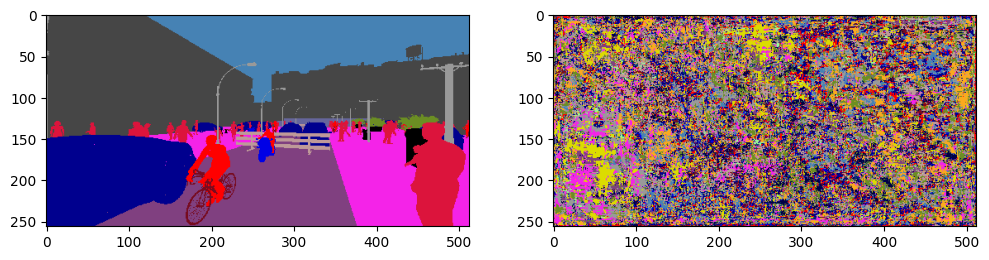

In [15]:
first_pred = preds[0]

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

ax[0].imshow(colorize_mask(target[0].numpy()), cmap='gray')
ax[1].imshow(colorize_mask(first_pred.numpy()), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


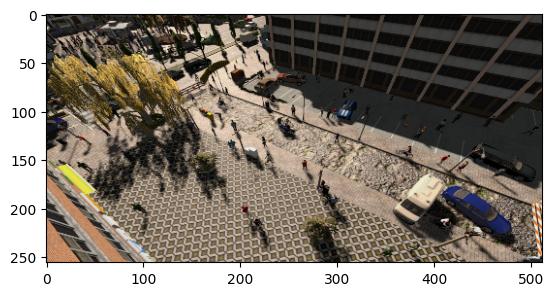

In [16]:
def denormalize(img):
    mean, std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

    return (img * std) + mean
    

img = denormalize(data[0].numpy().transpose((1, 2, 0)))
plt.imshow(img)

In [137]:
import segmentation_models_pytorch as smp
import metrics
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = A.Compose(
    [
        # A.SmallestMaxSize(max_size=160),
        # A.CenterCrop(height=128, width=128),
        # A.RandomCrop(width=256, height=256),
        # A.HorizontalFlip(p=0.5),
        # A.RandomBrightnessContrast(p=0.2),
        # A.Resize(256, 512),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])

# load the model
# model = smp.PSPNet(encoder_name='resnet101', encoder_weights="imagenet", classes=19, activation='softmax')
model = torch.load('./checkpoints/model_deeplab_55.pth') # model.load_state_dict(torch.load('./checkpoints/model.pth'))
model.eval()
model = model.to(DEVICE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0  1  2  3  4  5  7  8 10 11 12 13 15 18]
(256, 512)


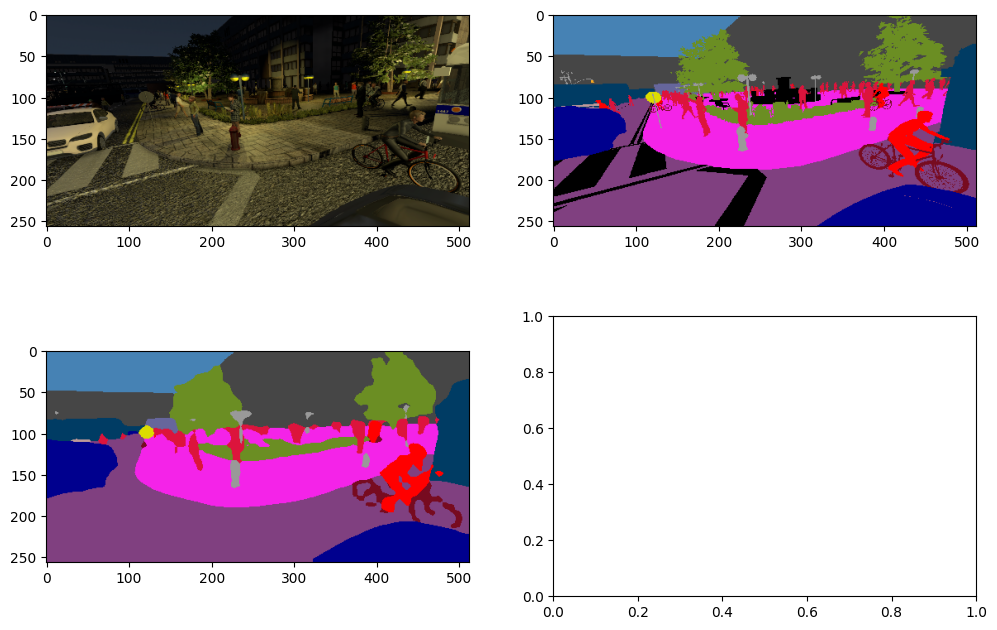

In [155]:
import dataset_cityscapes, dataset_synthia
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import cityscapes_shared_labels
import utils

def denormalize(img):
    mean= (0.485, 0.456, 0.406)
    std= (0.229, 0.224, 0.225)
    return (img * std) + mean


ds = dataset_synthia.Synthia('./synthia', split='val', transform=transform)
# ds = dataset_cityscapes.CityScapes('./cityscapes', split='val', transform=transform)
data_loader = DataLoader(ds, batch_size=8, shuffle=None)


for (data, targets) in data_loader:
    
    idx = 0
    img, mask = data[idx].numpy(), targets[idx].numpy()
    data, targets = data.to(DEVICE), targets.to(DEVICE)

    output = model(data[idx].unsqueeze(0))['out']
    preds = torch.argmax(output, dim=1)

    preds = preds.squeeze().cpu().numpy()
    print(np.unique(preds))
    print(preds.shape)

    
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
    ax[0][0].imshow(denormalize(img.transpose((1, 2, 0))))     # C x H x W 
    ax[0][1].imshow(dataset_cityscapes.colorize_mask(mask))
    ax[1][0].imshow(dataset_cityscapes.colorize_mask(preds))
    break

In [129]:
scores = {'cityscapes':{}, 'synthia': {}}

In [134]:
scores['cityscapes'][0] = []

scores['cityscapes'][0].append(5)
scores['cityscapes'][0].append(5)
print(scores['cityscapes'])

{0: [5, 5]}


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math


def visualize_scores(log_path, epochs=50, print_means=False, print_source=False):
    scores = {'cityscapes':{}, 'synthia': {}, 'cityscapes-ema': {}, 'synthia-ema': {}}
    with open(log_path, 'r') as f:
        data = f.readlines()
        for line in data:
            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])
            scores_epoch = [float(score) for score in tokens[2:-1]]
            scores[dataset][epoch] = scores_epoch

    epochs = np.arange(1, epochs + 1)
    scores_synthia_val, scores_cityscapes_val = [], []
    scores_synthia_ema_val, scores_cityscapes_ema_val = [], []

    for key in  scores['cityscapes']:
        scores_cityscapes_val.append(np.mean(scores['cityscapes'][key]))
        if print_means:
            print(np.mean(scores['cityscapes'][key]))

    for key in  scores['synthia']:
        scores_synthia_val.append(np.mean(scores['synthia'][key]))

    # also add scores when weight averaging is used
    for key in  scores['cityscapes-ema']:
        scores_cityscapes_ema_val.append(np.mean(scores['cityscapes-ema'][key]))
        if print_means:
            print(np.mean(scores['cityscapes-ema'][key]))

    for key in  scores['synthia-ema']:
        scores_synthia_ema_val.append(np.mean(scores['synthia-ema'][key]))

    
    plt.xlabel('EPOCHS')
    plt.ylabel('mean_IoU')
    if print_source:
        plt.plot(epochs, scores_synthia_val)
        plt.plot(epochs, scores_cityscapes_val)

    plt.plot(epochs, scores_synthia_val, epochs, scores_cityscapes_val)
    plt.gca().legend(('mean_IoU on SYNTHIA','mean_IoU on CityScapes'))
    
    plt.show()

#visualize_scores('logs/log_examined_new.txt', epochs=2, print_means=False)

Cityscapes-val-mean-IoU: 24.394438383838384
Cityscapes-val-mean-IoU: 29.561097979797978
Cityscapes-val-mean-IoU: 27.23131818181819
Cityscapes-val-mean-IoU: 25.10625050505051
Cityscapes-val-mean-IoU: 25.15019191919191
Cityscapes-val-EMA-mean-IoU: 25.121685858585856
Cityscapes-val-EMA-mean-IoU: 30.187979797979796
Cityscapes-val-EMA-mean-IoU: 26.322159595959594
Cityscapes-val-EMA-mean-IoU: 27.0702202020202
Cityscapes-val-EMA-mean-IoU: 26.738774747474753


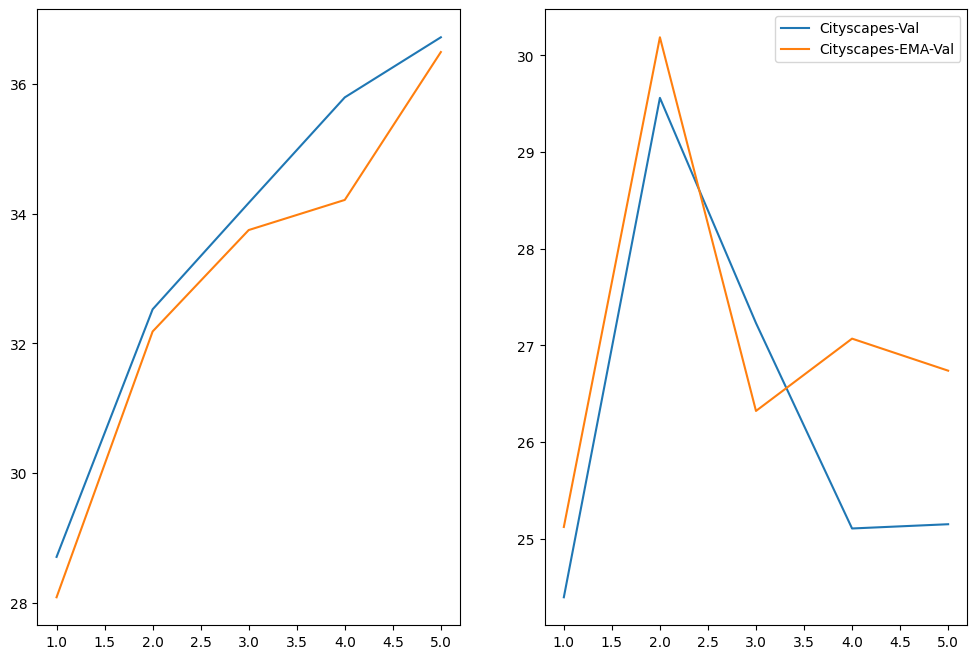

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math


def visualize_scores(log_path, print_means=False):
    scores = {'cityscapes':{}, 'synthia': {}, 'cityscapes-ema': {}, 'synthia-ema': {}}
    with open(log_path, 'r') as f:
        data = f.readlines()

        # detect #number of epochs
        last_line = data[-1].split(" ")
        epochs = int(last_line[1])
        
        for line in data:
            tokens = line.split(" ")
            dataset, epoch  = tokens[0], int(tokens[1])

            # fix the wrong data format
            scores_ = tokens[2:-1]
            scores_epoch = []
            for score_ in scores_:
                if "dtype" in score_:
                    continue

                if "tensor" in score_:
                    scores_epoch.append(float(score_[7:-1]))
            
            # scores_epoch = [float(score) for score in tokens[2:-1]]
            scores[dataset][epoch] = scores_epoch

    epochs = np.arange(1, epochs + 1)
    scores_synthia_val, scores_cityscapes_val = [], []
    scores_synthia_ema_val, scores_cityscapes_ema_val = [], []

    for key in  scores['cityscapes']:
        scores_cityscapes_val.append(np.mean(scores['cityscapes'][key]))
        if print_means:
            print(f"Cityscapes-val-mean-IoU: {np.mean(scores['cityscapes'][key])}")

    for key in  scores['synthia']:
        scores_synthia_val.append(np.mean(scores['synthia'][key]))

    # also add scores when weight averaging is used
    for key in  scores['cityscapes-ema']:
        scores_cityscapes_ema_val.append(np.mean(scores['cityscapes-ema'][key]))
        if print_means:
            print(f"Cityscapes-val-EMA-mean-IoU: {np.mean(scores['cityscapes-ema'][key])}")

    for key in  scores['synthia-ema']:
        scores_synthia_ema_val.append(np.mean(scores['synthia-ema'][key]))

    
    #plt.xlabel('EPOCHS')
    #plt.ylabel('mean_IoU')
    # plt.plot(epochs, scores_synthia_val)
    # plt.plot(epochs, scores_cityscapes_val)
    ax, fig = plt.subplots(ncols=2, figsize=(12, 8))
    fig[0].plot(epochs, scores_synthia_val, epochs, scores_synthia_ema_val)
    plt.legend(['Synthia-Val', 'Synthia-EMA-Val']);
    fig[1].plot(epochs, scores_cityscapes_val, epochs, scores_cityscapes_ema_val)
    plt.legend(['Cityscapes-Val', 'Cityscapes-EMA-Val']);
    #plt.plot(epochs, scores_synthia_val, epochs, scores_cityscapes_val)
    # plt.gca().legend(('mean_IoU on CityScapes','mean_IoU on CityScapes'))
    
    plt.show()

visualize_scores('logs/log_examined_new.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.524613131313135
Cityscapes-val-mean-IoU: 26.95912525252525
Cityscapes-val-mean-IoU: 28.314022222222224
Cityscapes-val-mean-IoU: 28.439141414141414
Cityscapes-val-EMA-mean-IoU: 26.352908080808085
Cityscapes-val-EMA-mean-IoU: 27.525046464646465
Cityscapes-val-EMA-mean-IoU: 28.43343131313131
Cityscapes-val-EMA-mean-IoU: 26.968548484848487


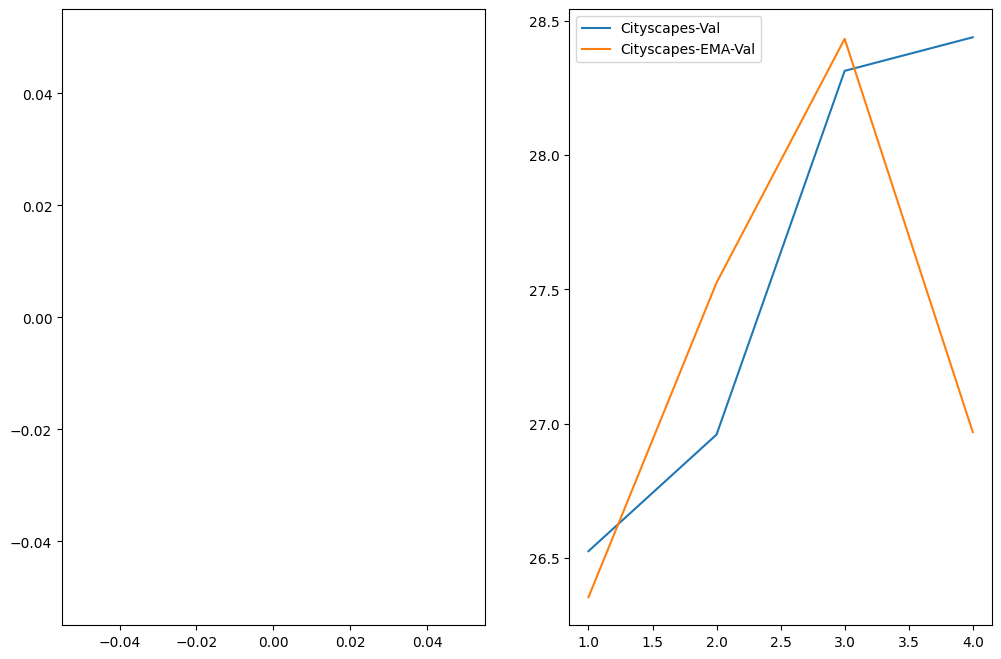

In [17]:
# 4 epochs - decay factor 0.99, batch 8, no weight decay, randomCrop
visualize_scores('logs/log_deeplab_wa_099_batch_8_no_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.544751515151518
Cityscapes-val-mean-IoU: 26.65680808080808
Cityscapes-val-mean-IoU: 24.992857575757576
Cityscapes-val-mean-IoU: 30.64366666666667
Cityscapes-val-mean-IoU: 26.324924242424242
Cityscapes-val-mean-IoU: 27.26156868686869
Cityscapes-val-mean-IoU: 24.133506060606063
Cityscapes-val-mean-IoU: 24.309949494949485
Cityscapes-val-mean-IoU: 24.813273737373745
Cityscapes-val-mean-IoU: 27.513760606060604
Cityscapes-val-EMA-mean-IoU: 24.519973737373736
Cityscapes-val-EMA-mean-IoU: 27.355903030303033
Cityscapes-val-EMA-mean-IoU: 25.112632323232322
Cityscapes-val-EMA-mean-IoU: 31.04574848484848
Cityscapes-val-EMA-mean-IoU: 27.989355555555548
Cityscapes-val-EMA-mean-IoU: 27.49057575757576
Cityscapes-val-EMA-mean-IoU: 25.28766060606061
Cityscapes-val-EMA-mean-IoU: 24.126169696969697
Cityscapes-val-EMA-mean-IoU: 25.12004141414141
Cityscapes-val-EMA-mean-IoU: 27.516707070707067


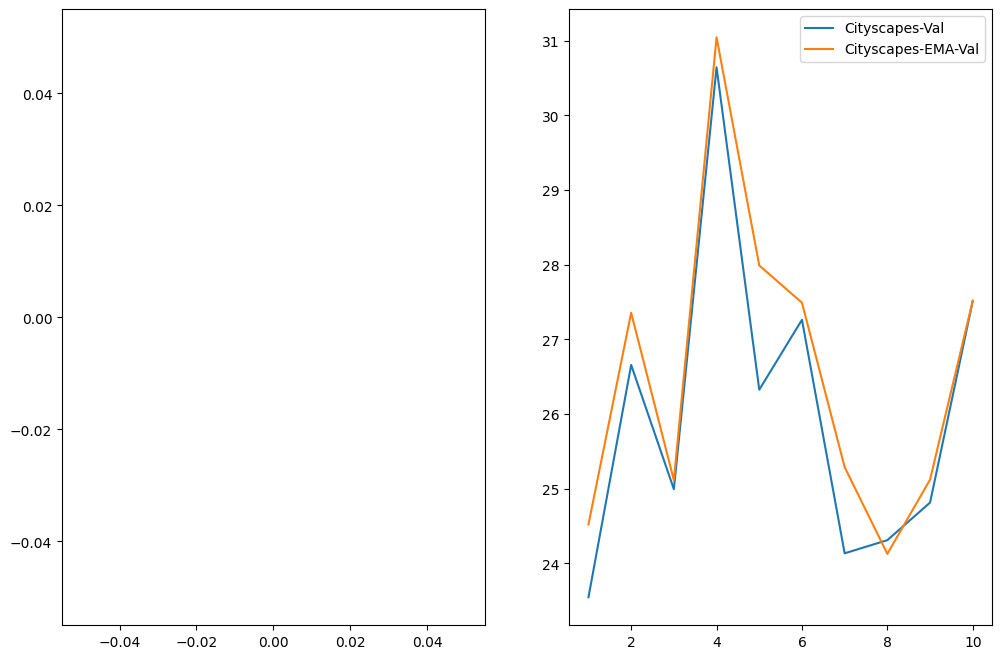

In [15]:
# 10 epochs - decay factor 0.99, batch 4, no weight decay, randomCrop
visualize_scores('logs/log_deeplab_wa_099_no_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.346245454545453
Cityscapes-val-mean-IoU: 27.907249494949497
Cityscapes-val-mean-IoU: 29.16598585858586
Cityscapes-val-mean-IoU: 27.43235555555556
Cityscapes-val-EMA-mean-IoU: 25.600182828282826
Cityscapes-val-EMA-mean-IoU: 27.577023232323235
Cityscapes-val-EMA-mean-IoU: 28.60067474747475
Cityscapes-val-EMA-mean-IoU: 26.072335353535347


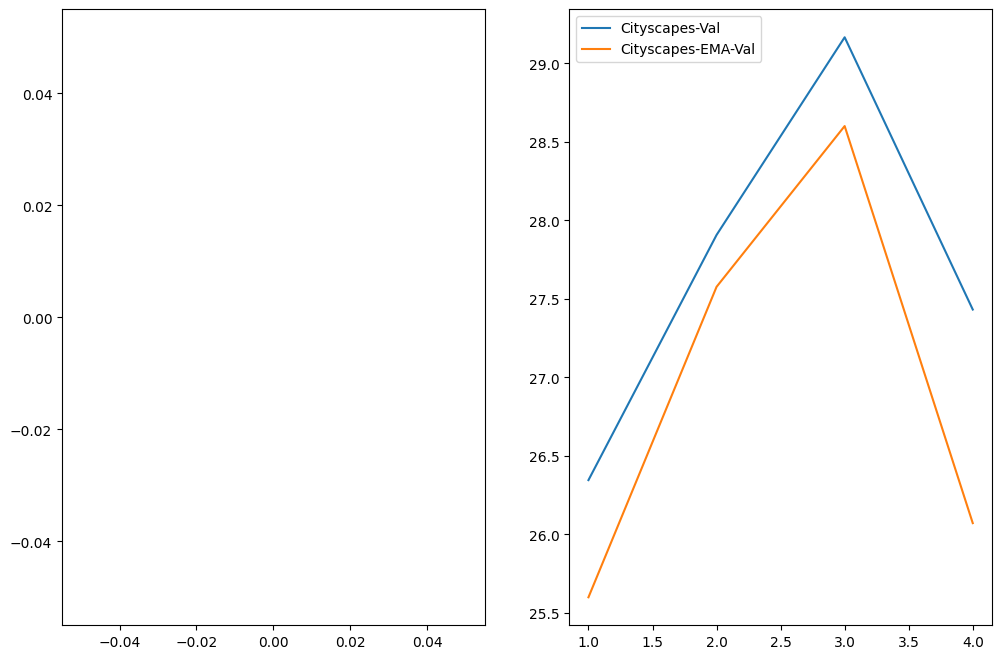

In [10]:
# 4 epochs - decay factor 0.999, batch 8, weight decay = 1.0e-3, randomCrop
visualize_scores('logs/log_deeplab_wa_0999_batch_8_high_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 24.854481818181814
Cityscapes-val-mean-IoU: 25.18093030303031
Cityscapes-val-mean-IoU: 24.669601010101015
Cityscapes-val-mean-IoU: 26.13987070707071
Cityscapes-val-mean-IoU: 26.653377777777774
Cityscapes-val-mean-IoU: 22.399980808080816
Cityscapes-val-mean-IoU: 23.293853535353534
Cityscapes-val-mean-IoU: 25.95485858585858
Cityscapes-val-mean-IoU: 27.221613131313134
Cityscapes-val-mean-IoU: 29.85430707070707
Cityscapes-val-EMA-mean-IoU: 23.559393939393942
Cityscapes-val-EMA-mean-IoU: 27.971907070707072
Cityscapes-val-EMA-mean-IoU: 21.951836363636364
Cityscapes-val-EMA-mean-IoU: 26.583773737373736
Cityscapes-val-EMA-mean-IoU: 27.558856565656566
Cityscapes-val-EMA-mean-IoU: 21.97786161616161
Cityscapes-val-EMA-mean-IoU: 23.546295959595962
Cityscapes-val-EMA-mean-IoU: 26.153183838383843
Cityscapes-val-EMA-mean-IoU: 27.360643434343434
Cityscapes-val-EMA-mean-IoU: 29.953711111111108


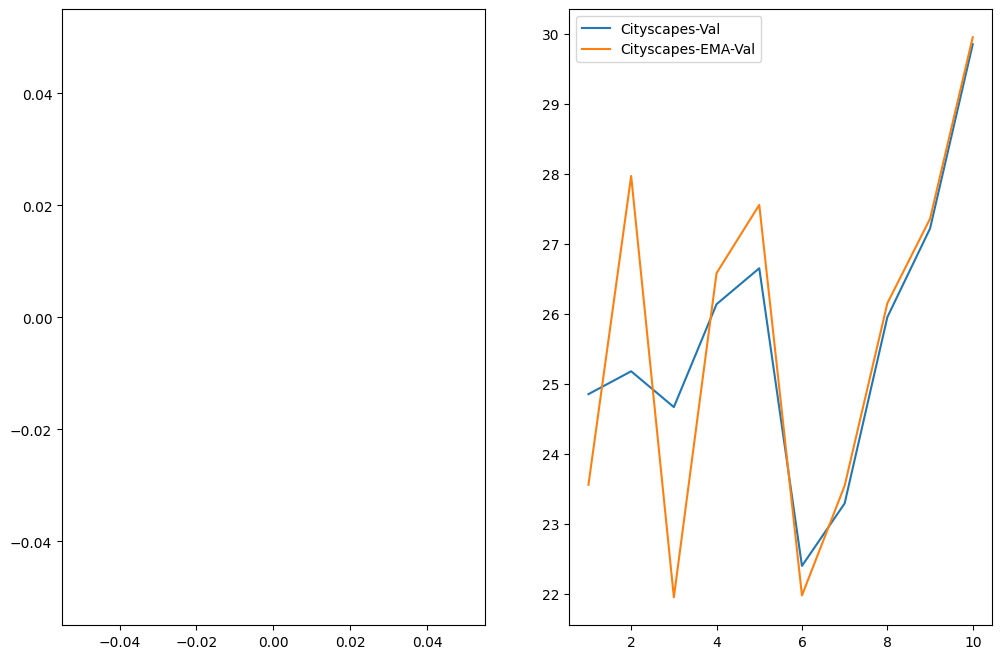

In [12]:
# 10 epochs - decay factor 0.999, batch 8, no weight decay, randomCrop
visualize_scores('logs/log_deeplab_wa_0999_no_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.72084444444444
Cityscapes-val-mean-IoU: 26.06028686868687
Cityscapes-val-mean-IoU: 27.61551313131313
Cityscapes-val-mean-IoU: 29.495052525252532
Cityscapes-val-mean-IoU: 24.493031313131315
Cityscapes-val-mean-IoU: 24.42354141414141
Cityscapes-val-mean-IoU: 22.511719191919195
Cityscapes-val-mean-IoU: 25.1558
Cityscapes-val-mean-IoU: 25.15289292929293
Cityscapes-val-mean-IoU: 28.634331313131312
Cityscapes-val-EMA-mean-IoU: 24.8241
Cityscapes-val-EMA-mean-IoU: 26.071057575757578
Cityscapes-val-EMA-mean-IoU: 24.05400404040404
Cityscapes-val-EMA-mean-IoU: 27.966586868686868
Cityscapes-val-EMA-mean-IoU: 25.4328101010101
Cityscapes-val-EMA-mean-IoU: 23.92528282828283
Cityscapes-val-EMA-mean-IoU: 24.13500909090909
Cityscapes-val-EMA-mean-IoU: 25.84489090909091
Cityscapes-val-EMA-mean-IoU: 23.0578202020202
Cityscapes-val-EMA-mean-IoU: 26.80996363636364


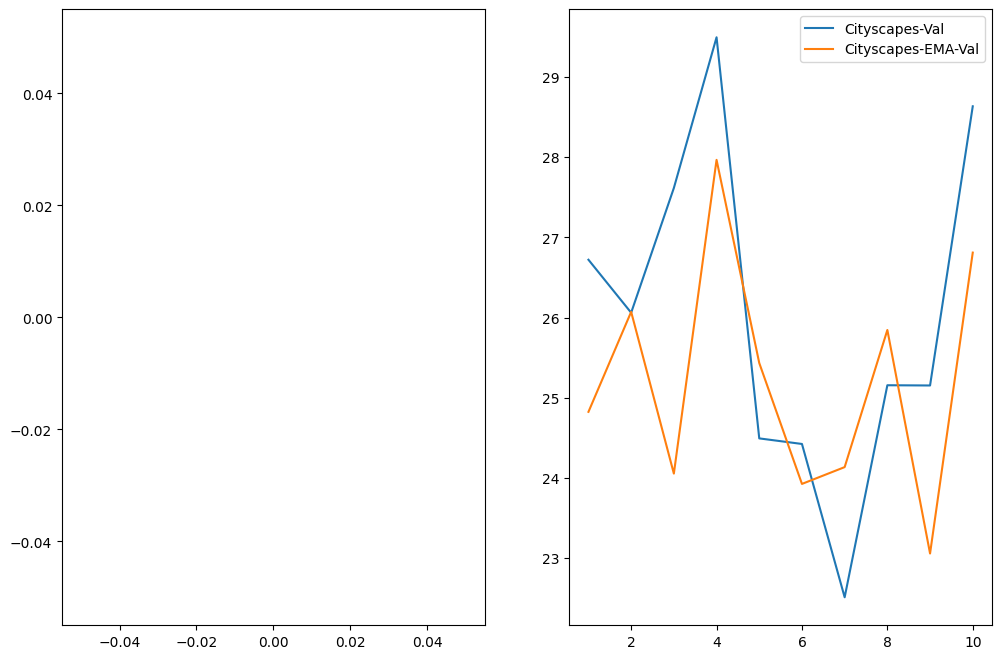

In [13]:
# 10 epochs - decay factor 0.999, batch 8, weight decay = 1.0e-5, randomCrop
visualize_scores('logs/log_deeplab_wa_0999_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 28.035926262626262
Cityscapes-val-mean-IoU: 28.410611111111113
Cityscapes-val-mean-IoU: 25.65012424242424
Cityscapes-val-mean-IoU: 27.032780808080812
Cityscapes-val-mean-IoU: 30.570962626262627
Cityscapes-val-mean-IoU: 29.12309696969697
Cityscapes-val-mean-IoU: 27.8980494949495
Cityscapes-val-mean-IoU: 26.10214444444445
Cityscapes-val-mean-IoU: 27.339941414141418
Cityscapes-val-mean-IoU: 28.478409090909093
Cityscapes-val-EMA-mean-IoU: 27.460423232323237
Cityscapes-val-EMA-mean-IoU: 27.994870707070714
Cityscapes-val-EMA-mean-IoU: 26.50088686868687
Cityscapes-val-EMA-mean-IoU: 24.53752727272727
Cityscapes-val-EMA-mean-IoU: 29.062225252525252
Cityscapes-val-EMA-mean-IoU: 29.827649494949487
Cityscapes-val-EMA-mean-IoU: 26.3080202020202
Cityscapes-val-EMA-mean-IoU: 28.11357171717172
Cityscapes-val-EMA-mean-IoU: 28.61159696969697
Cityscapes-val-EMA-mean-IoU: 26.80399090909091


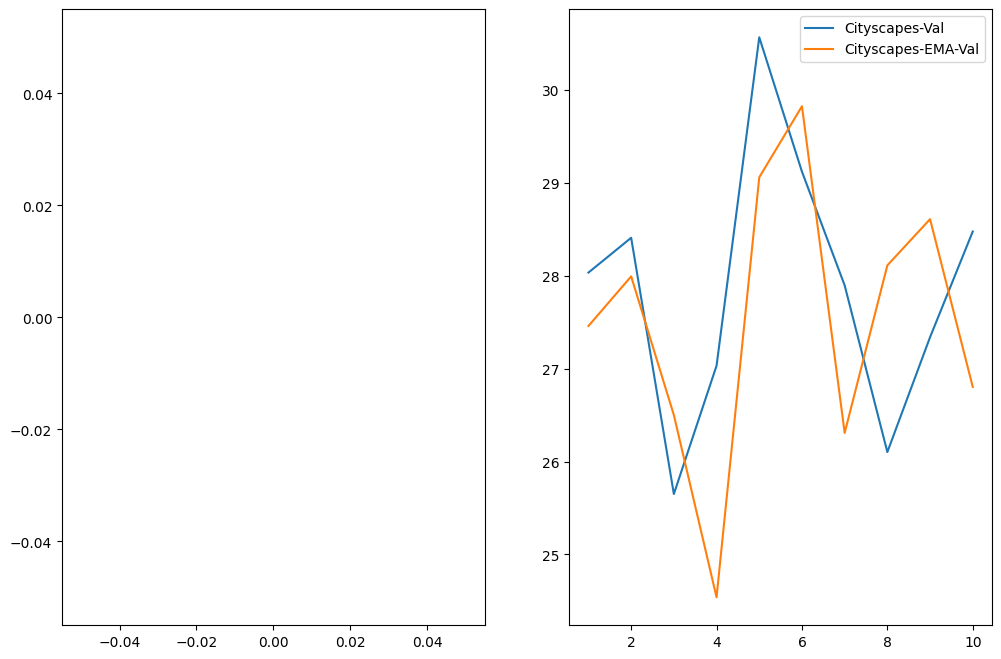

In [18]:
# 10 epochs - decay factor 0.999, batch 4, weight decay = 1.0e-3, randomCrop
visualize_scores('logs/log_deeplab_wa_0999_high_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.14249494949495
Cityscapes-val-mean-IoU: 28.502637373737375
Cityscapes-val-mean-IoU: 27.77007878787879
Cityscapes-val-mean-IoU: 27.80449696969697
Cityscapes-val-EMA-mean-IoU: 26.12723030303031
Cityscapes-val-EMA-mean-IoU: 27.639696969696974
Cityscapes-val-EMA-mean-IoU: 29.09383232323232
Cityscapes-val-EMA-mean-IoU: 24.491135353535352


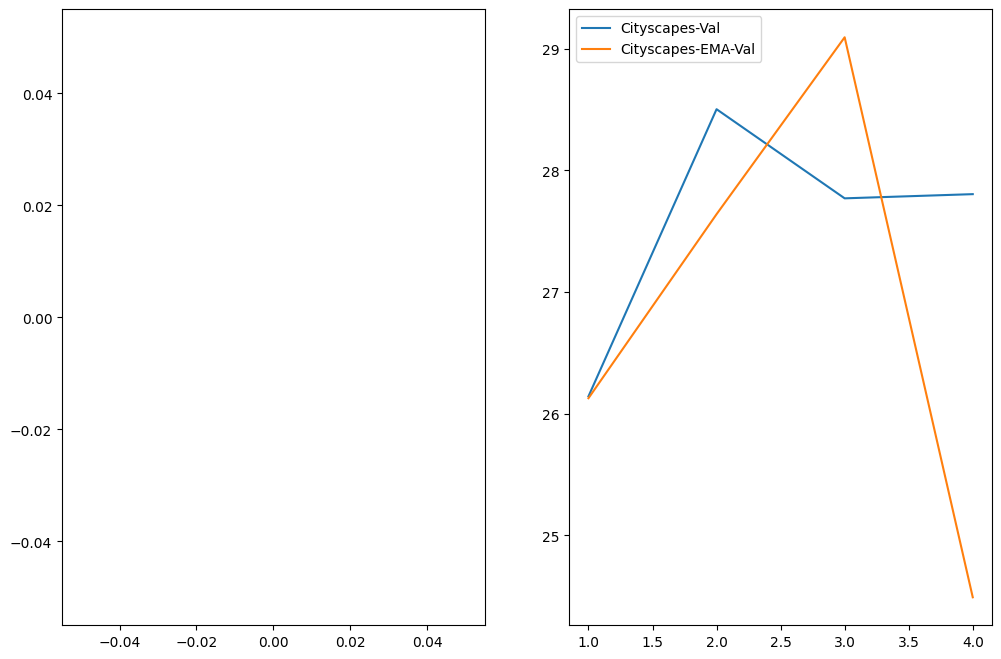

In [19]:
# 4 epochs - decay factor 0.999, batch 8, weight decay = 1.0e-5, randomCrop
visualize_scores('logs/log_deeplab_wa_0999_batch_8_wd.txt', print_means=True)

Cityscapes-val-mean-IoU: 24.72631818181818
Cityscapes-val-mean-IoU: 24.48369191919192
Cityscapes-val-EMA-mean-IoU: 24.246393939393936
Cityscapes-val-EMA-mean-IoU: 23.870645454545453


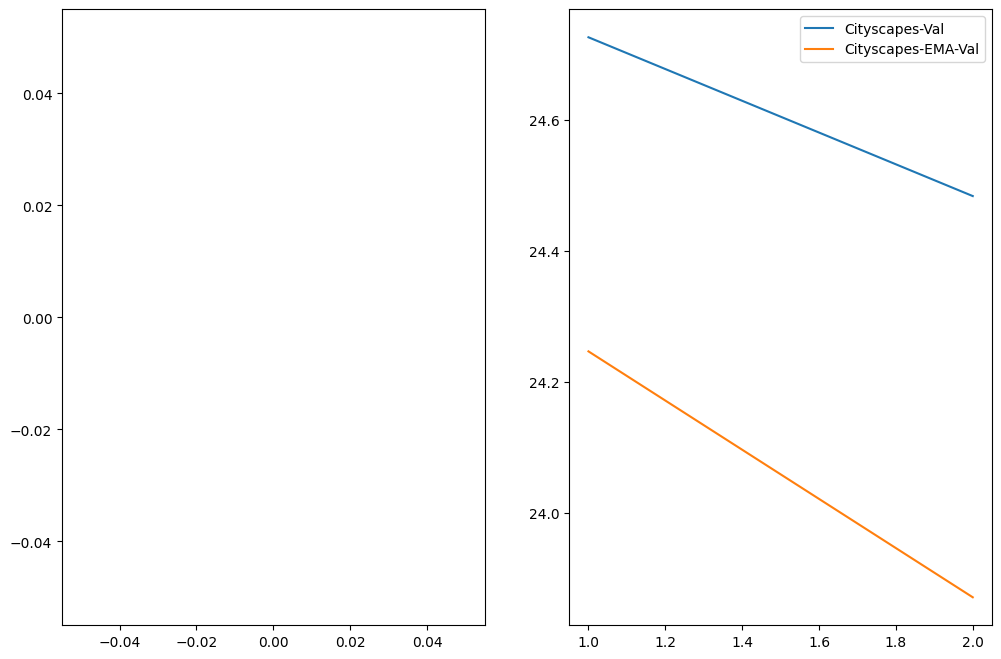

In [21]:
# 4 epochs - decay factor 0.999, batch 8, weight decay = 1.0e-5, no randomCrop
visualize_scores('logs/log_deeplab_wa_099_batch_8_no_wd_no_cropping.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.699157575757575
Cityscapes-val-mean-IoU: 28.27968383838384
Cityscapes-val-mean-IoU: 26.2036202020202
Cityscapes-val-mean-IoU: 26.54212121212121
Cityscapes-val-mean-IoU: 23.85623333333334
Cityscapes-val-EMA-mean-IoU: 27.94461414141414
Cityscapes-val-EMA-mean-IoU: 27.611947474747478
Cityscapes-val-EMA-mean-IoU: 27.84285757575758
Cityscapes-val-EMA-mean-IoU: 26.511813131313126
Cityscapes-val-EMA-mean-IoU: 25.365174747474754


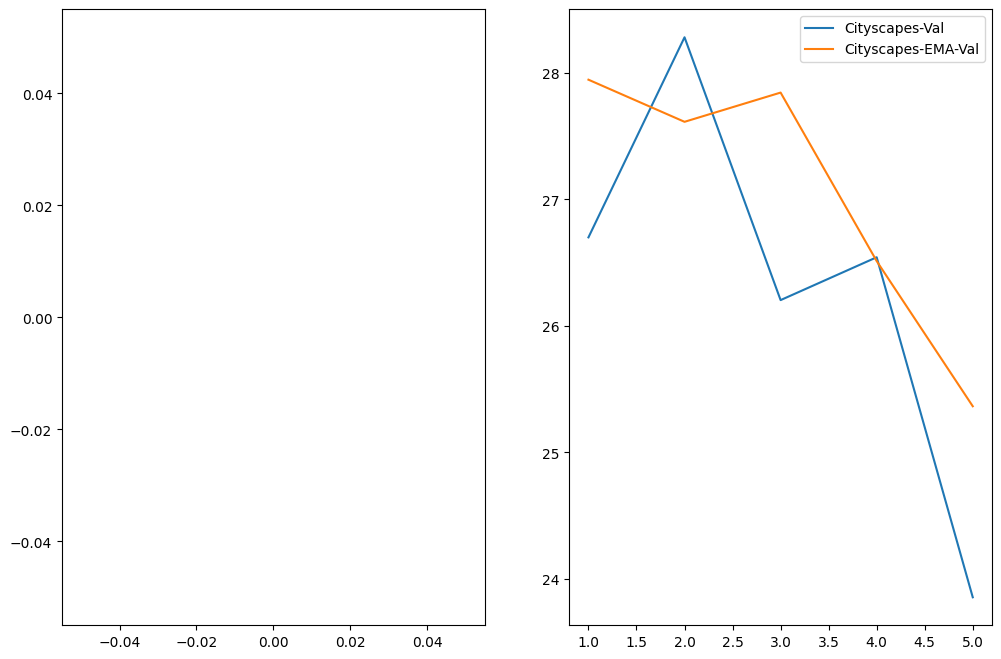

In [31]:
# 5 epochs - decay factor 0.999, batch 4, weight decay = 1.0e-5, randomCrop, regularization: lambda = 1.0e-3
visualize_scores('logs/log_deeplab_batch_4_no_wd_regularized_cropping.txt', print_means=True)

Cityscapes-val-mean-IoU: 25.80842626262626
Cityscapes-val-mean-IoU: 21.077269696969697
Cityscapes-val-mean-IoU: 24.02405555555555
Cityscapes-val-EMA-mean-IoU: 24.859943434343432
Cityscapes-val-EMA-mean-IoU: 21.356443434343433
Cityscapes-val-EMA-mean-IoU: 21.642466666666664


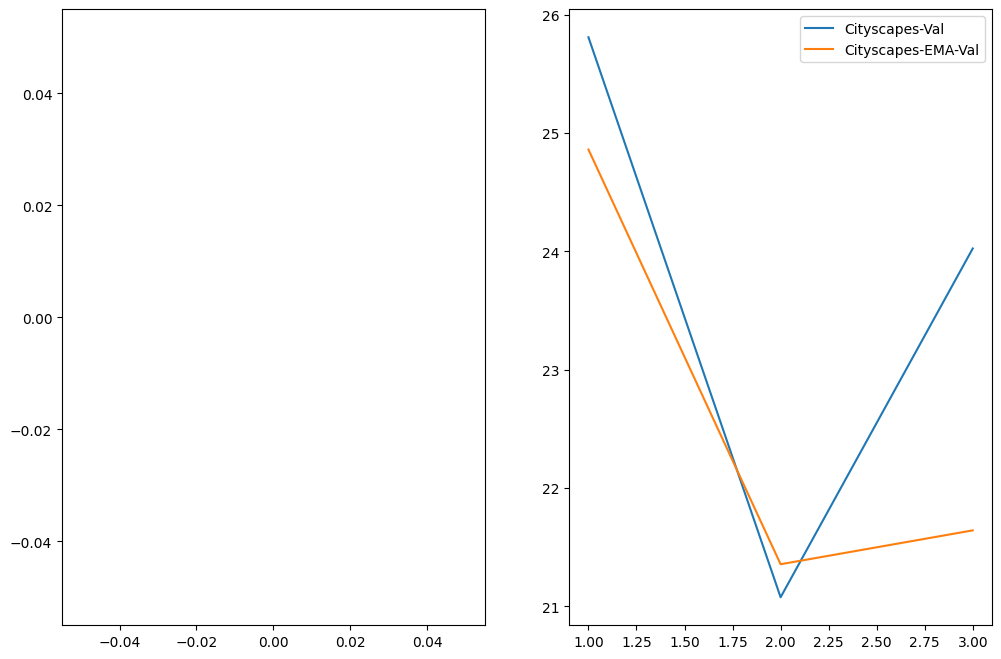

In [49]:
# 5 epochs - decay factor 0.999, batch 4, weight decay = 1.0e-5, randomCrop, regularization: lambda = 1.0e-3
visualize_scores('logs/log_deeplab_batch_4_no_wd_warmup_cosine.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.46948282828283
Cityscapes-val-mean-IoU: 24.48947171717172
Cityscapes-val-mean-IoU: 29.04002626262626
Cityscapes-val-mean-IoU: 28.620954545454545
Cityscapes-val-mean-IoU: 24.59046565656566
Cityscapes-val-mean-IoU: 28.903961616161613
Cityscapes-val-mean-IoU: 28.701152525252528
Cityscapes-val-mean-IoU: 33.10356262626262
Cityscapes-val-mean-IoU: 32.625277777777775
Cityscapes-val-mean-IoU: 33.44041111111111
Cityscapes-val-mean-IoU: 32.3082595959596
Cityscapes-val-mean-IoU: 31.77204040404041
Cityscapes-val-mean-IoU: 31.515529292929294
Cityscapes-val-mean-IoU: 30.079958585858584
Cityscapes-val-mean-IoU: 29.832956565656566
Cityscapes-val-mean-IoU: 28.136398989898982
Cityscapes-val-mean-IoU: 31.903046464646465
Cityscapes-val-mean-IoU: 32.82008282828283
Cityscapes-val-mean-IoU: 32.476261616161615
Cityscapes-val-mean-IoU: 31.24130808080808
Cityscapes-val-mean-IoU: 31.169021212121212
Cityscapes-val-mean-IoU: 32.16048585858586
Cityscapes-val-mean-IoU: 31.60132727272727
C

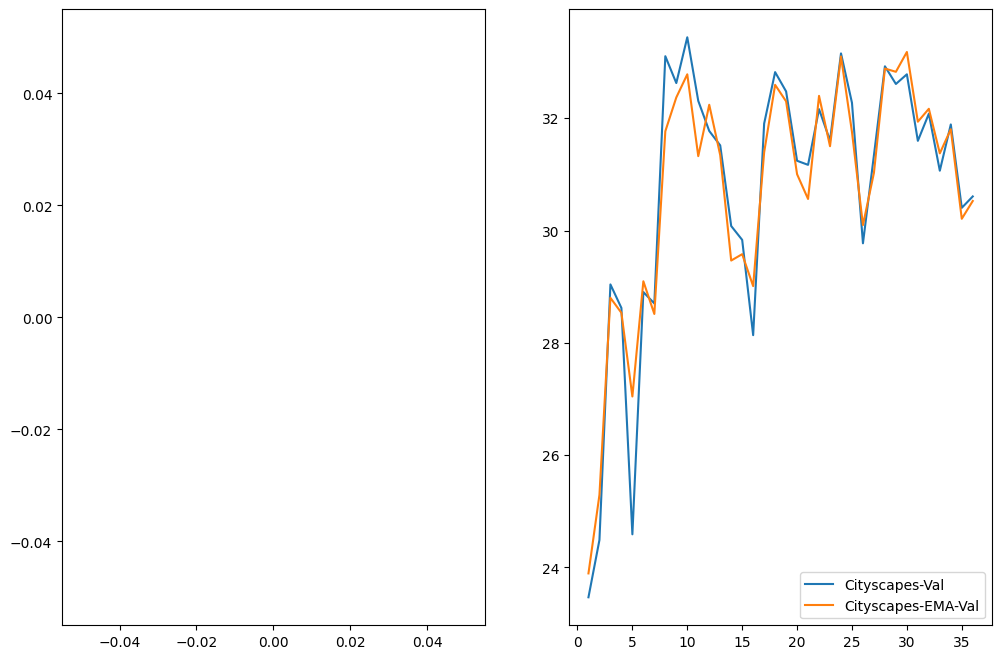

In [35]:
# 35 epochs - decay factor 0.99, batch 4, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_batch_4_no_wd_warmup_cosine_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 21.925069696969697
Cityscapes-val-mean-IoU: 23.46410303030303
Cityscapes-val-mean-IoU: 22.290521212121206
Cityscapes-val-mean-IoU: 23.066319191919188
Cityscapes-val-mean-IoU: 22.900624242424247
Cityscapes-val-mean-IoU: 23.869491919191915
Cityscapes-val-mean-IoU: 23.033490909090908
Cityscapes-val-mean-IoU: 24.516250505050504
Cityscapes-val-mean-IoU: 23.55256363636364
Cityscapes-val-mean-IoU: 24.135625252525255
Cityscapes-val-mean-IoU: 23.547603030303037
Cityscapes-val-mean-IoU: 24.052289898989894
Cityscapes-val-mean-IoU: 23.872134343434343
Cityscapes-val-mean-IoU: 25.17066363636364
Cityscapes-val-mean-IoU: 24.63200808080808
Cityscapes-val-mean-IoU: 24.13453838383838
Cityscapes-val-mean-IoU: 24.88123737373737
Cityscapes-val-mean-IoU: 24.116620202020197
Cityscapes-val-mean-IoU: 25.46680202020202
Cityscapes-val-EMA-mean-IoU: 21.67871313131313
Cityscapes-val-EMA-mean-IoU: 23.925994949494942
Cityscapes-val-EMA-mean-IoU: 22.771542424242426
Cityscapes-val-EMA-mean-IoU:

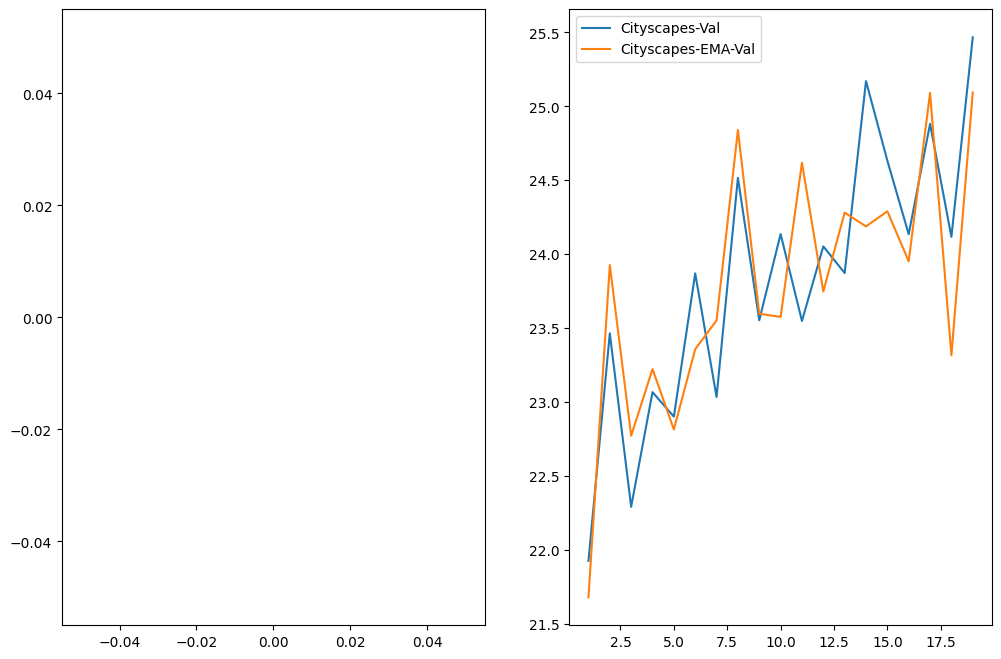

In [128]:
# backbone freezing #
# 5 epochs - decay factor 0.99, batch 4, 2000 warmup-steps, weight decay = 0, backbone frozen, randomCrop, SGD
visualize_scores('logs/log_deeplab_batch_4_no_wd_warmup_cosine_SGD_backbone_frozen.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.30009393939394
Cityscapes-val-mean-IoU: 22.860649494949495
Cityscapes-val-mean-IoU: 28.785895959595955
Cityscapes-val-mean-IoU: 29.893914141414147
Cityscapes-val-mean-IoU: 29.76105858585859
Cityscapes-val-mean-IoU: 30.2675404040404
Cityscapes-val-mean-IoU: 28.212187878787876
Cityscapes-val-mean-IoU: 30.90987878787879
Cityscapes-val-mean-IoU: 29.090441414141413
Cityscapes-val-mean-IoU: 32.57928383838384
Cityscapes-val-mean-IoU: 29.505781818181823
Cityscapes-val-mean-IoU: 29.88484848484849
Cityscapes-val-mean-IoU: 33.33542828282828
Cityscapes-val-mean-IoU: 28.920465656565657
Cityscapes-val-mean-IoU: 29.56160808080808
Cityscapes-val-mean-IoU: 31.296288888888892
Cityscapes-val-mean-IoU: 32.45613939393939
Cityscapes-val-mean-IoU: 31.924151515151515
Cityscapes-val-mean-IoU: 30.53631212121212
Cityscapes-val-mean-IoU: 31.97540101010101
Cityscapes-val-mean-IoU: 32.90555353535353
Cityscapes-val-mean-IoU: 29.965701010101007
Cityscapes-val-mean-IoU: 30.463745454545457
C

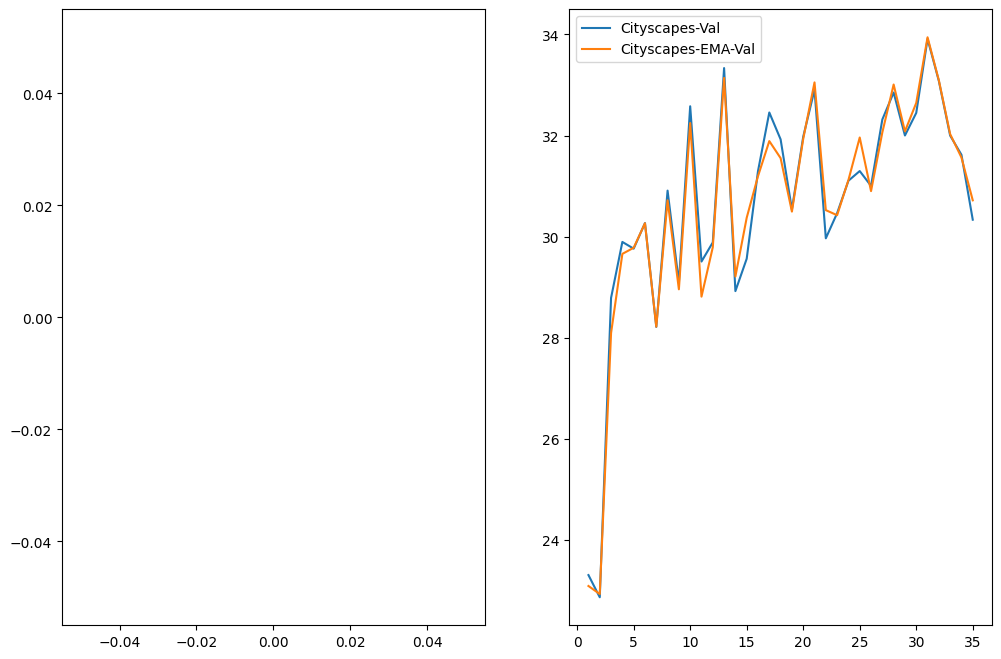

In [8]:
# 50 epochs - decay factor 0.95, batch 4, 2000 warmup-steps, weight decay = 0, decay_factor 0.95, randomCrop, SGD
visualize_scores('logs/log_deeplab_batch_4_no_wd_wa_095_warmup_cosine_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 24.845171717171716
Cityscapes-val-mean-IoU: 29.864460606060607
Cityscapes-val-mean-IoU: 25.343153535353537
Cityscapes-val-mean-IoU: 24.693994949494947
Cityscapes-val-mean-IoU: 21.449633333333338
Cityscapes-val-EMA-mean-IoU: 25.131910101010106
Cityscapes-val-EMA-mean-IoU: 23.496386868686873
Cityscapes-val-EMA-mean-IoU: 25.15299393939394
Cityscapes-val-EMA-mean-IoU: 26.793060606060607
Cityscapes-val-EMA-mean-IoU: 23.242846464646465


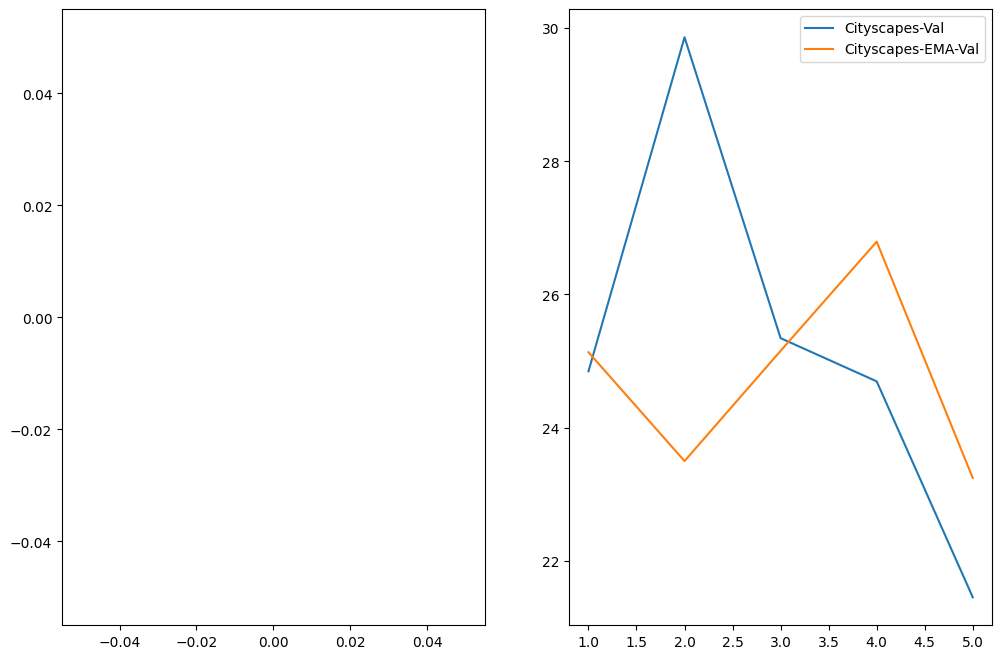

In [28]:
# 50 epochs, lr=0.001, decay factor 0.95, batch 4, 2000 warmup-steps, weight decay = 0, decay_factor 0.95, randomCrop, AdamW
visualize_scores('logs/log_deeplab_batch_4_no_wd_wa_095_warmup_cosine_AdamW.txt', print_means=True)

Cityscapes-val-mean-IoU: 24.46908888888889
Cityscapes-val-mean-IoU: 26.534292929292928
Cityscapes-val-mean-IoU: 29.433394949494947
Cityscapes-val-mean-IoU: 25.980064646464644
Cityscapes-val-mean-IoU: 29.106660606060608
Cityscapes-val-mean-IoU: 27.99568484848485
Cityscapes-val-mean-IoU: 26.390229292929295
Cityscapes-val-mean-IoU: 27.4469505050505
Cityscapes-val-mean-IoU: 30.994838383838385
Cityscapes-val-mean-IoU: 27.12950909090909
Cityscapes-val-mean-IoU: 26.868634343434337
Cityscapes-val-mean-IoU: 29.537005050505048
Cityscapes-val-mean-IoU: 28.411796969696976
Cityscapes-val-mean-IoU: 28.131711111111112
Cityscapes-val-mean-IoU: 25.325548484848486
Cityscapes-val-mean-IoU: 28.02412828282828
Cityscapes-val-EMA-mean-IoU: 24.17826767676768
Cityscapes-val-EMA-mean-IoU: 25.832281818181812
Cityscapes-val-EMA-mean-IoU: 29.804876767676767
Cityscapes-val-EMA-mean-IoU: 25.72455656565657
Cityscapes-val-EMA-mean-IoU: 28.846922222222222
Cityscapes-val-EMA-mean-IoU: 28.338431313131313
Cityscapes-val-E

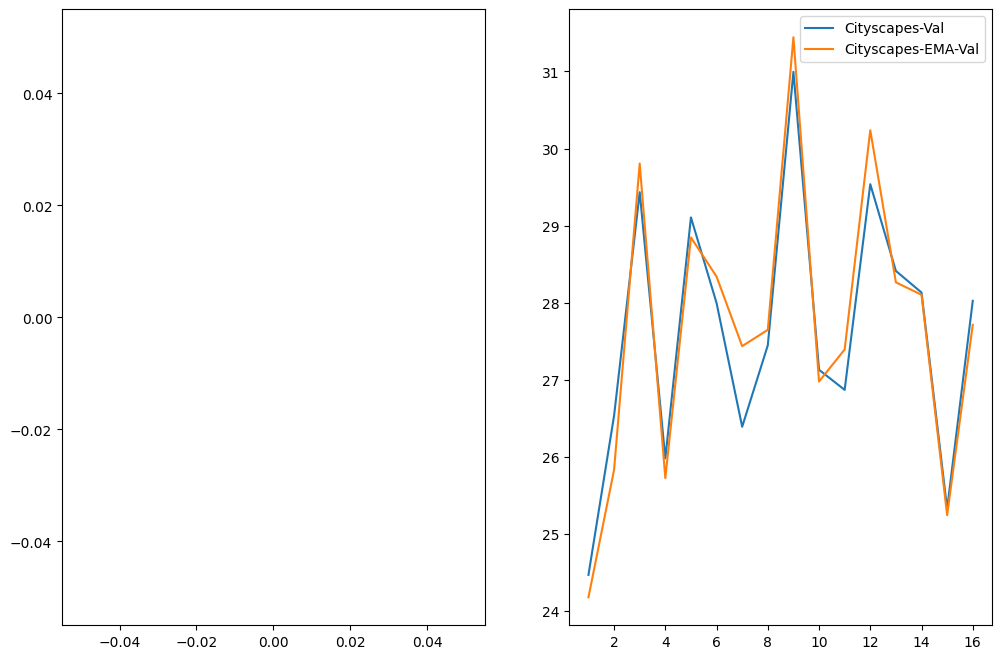

In [26]:
# 50 epochs, lr=1.0e-5, decay factor 0.95, batch 4, 2000 warmup-steps, weight decay = 0, decay_factor 0.95, randomCrop, AdamW
visualize_scores('logs/log_deeplab_wa_095_no_wd_batch_size_4.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.826547474747475
Cityscapes-val-mean-IoU: 24.840466666666664
Cityscapes-val-mean-IoU: 23.967510101010106
Cityscapes-val-mean-IoU: 22.477032323232322
Cityscapes-val-mean-IoU: 21.009038383838384
Cityscapes-val-mean-IoU: 25.11461919191919
Cityscapes-val-mean-IoU: 17.77451818181818
Cityscapes-val-mean-IoU: 24.829605050505048
Cityscapes-val-mean-IoU: 19.588881818181818
Cityscapes-val-mean-IoU: 20.290829292929292
Cityscapes-val-mean-IoU: 23.412820202020203
Cityscapes-val-mean-IoU: 23.145396969696968
Cityscapes-val-mean-IoU: 27.68697575757576
Cityscapes-val-mean-IoU: 22.992182828282825
Cityscapes-val-mean-IoU: 24.58049292929293
Cityscapes-val-mean-IoU: 27.395853535353535
Cityscapes-val-mean-IoU: 28.470888888888894
Cityscapes-val-mean-IoU: 27.517111111111106
Cityscapes-val-mean-IoU: 24.213518181818184
Cityscapes-val-mean-IoU: 27.454900000000002
Cityscapes-val-mean-IoU: 24.072135353535348
Cityscapes-val-mean-IoU: 22.03637474747475
Cityscapes-val-mean-IoU: 25.630976767

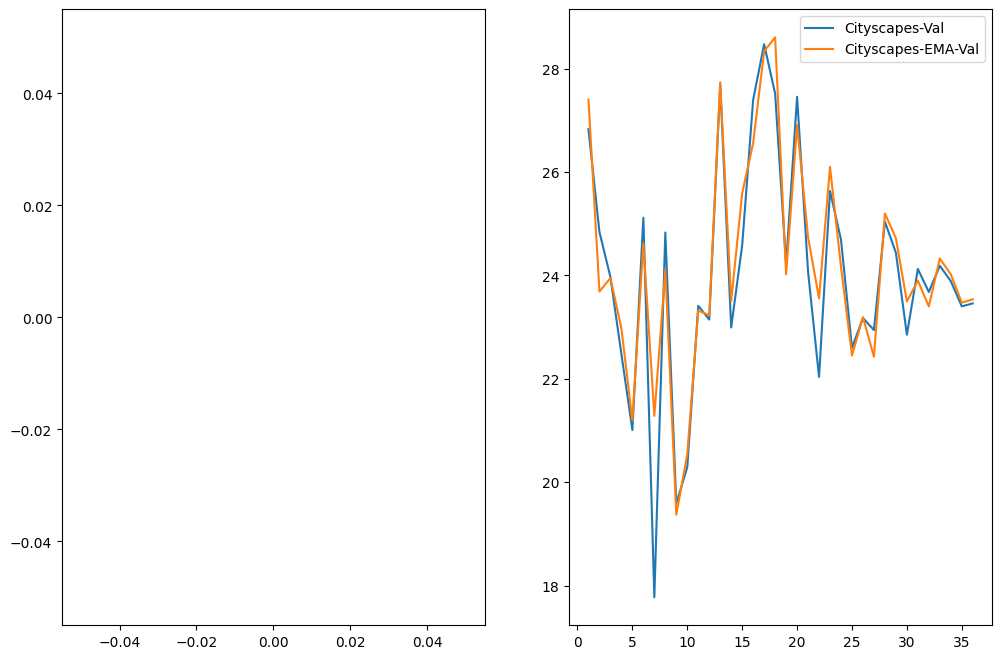

In [89]:
# 50 epochs, lr=1.0e-4, decay factor 0.95, batch 4, 2000 warmup-steps, weight decay = 0, decay_factor 0.95, randomCrop, AdamW
visualize_scores('logs/log_deeplab_wa_095_batch_4_no_wd_lr_1e-4.txt', print_means=True)

Cityscapes-val-mean-IoU: 21.963885858585854
Cityscapes-val-mean-IoU: 25.364518181818184
Cityscapes-val-mean-IoU: 27.521681818181815
Cityscapes-val-mean-IoU: 25.13113333333333
Cityscapes-val-mean-IoU: 29.273240404040404
Cityscapes-val-mean-IoU: 31.51684141414142
Cityscapes-val-mean-IoU: 30.792274747474746
Cityscapes-val-mean-IoU: 30.188110101010103
Cityscapes-val-mean-IoU: 29.949914141414144
Cityscapes-val-mean-IoU: 29.58128585858586
Cityscapes-val-mean-IoU: 29.38741313131313
Cityscapes-val-mean-IoU: 31.527509090909096
Cityscapes-val-mean-IoU: 29.422379797979797
Cityscapes-val-mean-IoU: 28.57756060606061
Cityscapes-val-mean-IoU: 27.415195959595962
Cityscapes-val-mean-IoU: 28.81635353535354
Cityscapes-val-mean-IoU: 31.508778787878786
Cityscapes-val-mean-IoU: 32.72886363636364
Cityscapes-val-mean-IoU: 29.863823232323234
Cityscapes-val-mean-IoU: 30.747569696969695
Cityscapes-val-mean-IoU: 29.688552525252522
Cityscapes-val-mean-IoU: 28.814854545454548
Cityscapes-val-mean-IoU: 29.97204646464

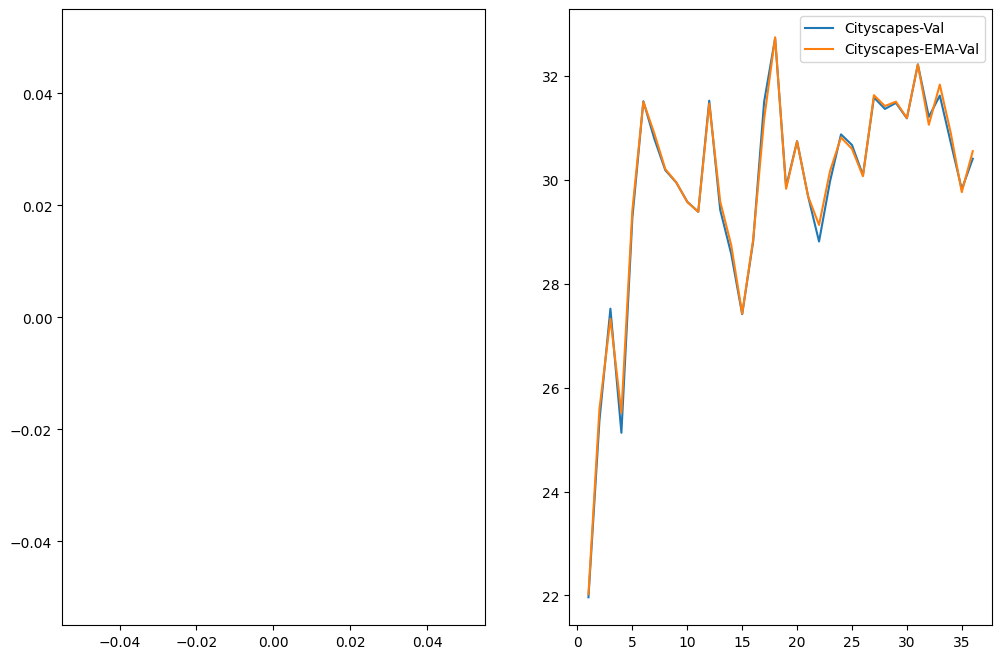

In [83]:
# 50 epochs, lr=1.0e-3, decay factor 0.9, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_09_no_wd_batch_size_4_lr1e-3_warmups2000_cosine5Restarts.txt', print_means=True)

Cityscapes-val-mean-IoU: 27.746088888888888
Cityscapes-val-mean-IoU: 26.069743434343433
Cityscapes-val-mean-IoU: 30.679646464646467
Cityscapes-val-mean-IoU: 29.851886868686865
Cityscapes-val-mean-IoU: 30.59689090909091
Cityscapes-val-mean-IoU: 30.939046464646463
Cityscapes-val-mean-IoU: 31.89381616161616
Cityscapes-val-mean-IoU: 31.496161616161615
Cityscapes-val-mean-IoU: 31.552950505050504
Cityscapes-val-mean-IoU: 31.652841414141413
Cityscapes-val-mean-IoU: 27.9444202020202
Cityscapes-val-mean-IoU: 33.63582424242424
Cityscapes-val-mean-IoU: 30.744685858585857
Cityscapes-val-mean-IoU: 30.485861616161618
Cityscapes-val-mean-IoU: 32.45779595959596
Cityscapes-val-mean-IoU: 30.80474141414141
Cityscapes-val-mean-IoU: 32.00728888888888
Cityscapes-val-mean-IoU: 33.46780707070707
Cityscapes-val-mean-IoU: 32.0841303030303
Cityscapes-val-mean-IoU: 32.15097171717172
Cityscapes-val-mean-IoU: 31.980065656565657
Cityscapes-val-mean-IoU: 28.432734343434337
Cityscapes-val-mean-IoU: 30.04945757575758
C

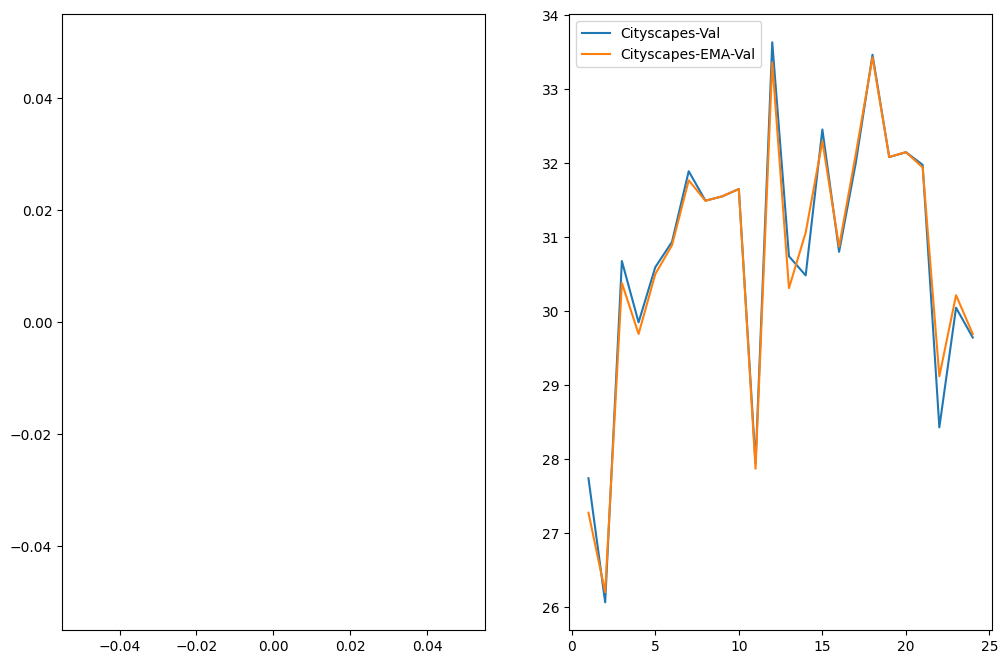

In [94]:
# 50 epochs, lr=1.0e-3, decay factor 0.9, batch 4, no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_09_batch_4_lr_1e0-3_cosineAnnealingWarmRestarts5Times_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.61849393939394
Cityscapes-val-mean-IoU: 23.545567676767675
Cityscapes-val-mean-IoU: 30.211143434343438
Cityscapes-val-mean-IoU: 30.92185151515152
Cityscapes-val-mean-IoU: 28.2119898989899
Cityscapes-val-mean-IoU: 28.478310101010106
Cityscapes-val-mean-IoU: 32.480398989898994
Cityscapes-val-mean-IoU: 31.822815151515147
Cityscapes-val-mean-IoU: 32.028565656565654
Cityscapes-val-mean-IoU: 32.20455858585859
Cityscapes-val-mean-IoU: 31.062657575757573
Cityscapes-val-mean-IoU: 30.006913131313134
Cityscapes-val-mean-IoU: 33.496677777777776
Cityscapes-val-mean-IoU: 31.30617878787879
Cityscapes-val-mean-IoU: 32.30924242424242
Cityscapes-val-mean-IoU: 30.561404040404042
Cityscapes-val-mean-IoU: 33.01699393939394
Cityscapes-val-mean-IoU: 33.75815050505051
Cityscapes-val-mean-IoU: 32.11089595959596
Cityscapes-val-mean-IoU: 31.300653535353543
Cityscapes-val-mean-IoU: 32.615396969696974
Cityscapes-val-mean-IoU: 27.509042424242423
Cityscapes-val-mean-IoU: 32.64912525252525

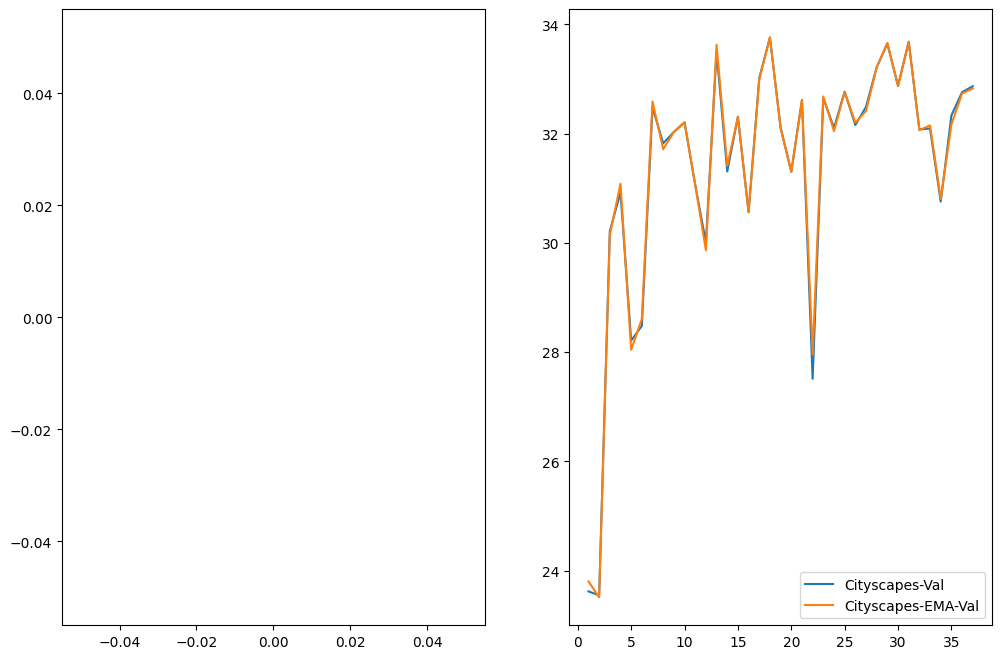

In [88]:
# 50 epochs, lr=1.0e-3, decay factor 0.75, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_075_no_wd_batch_size_4_lr1e-3_warmups2000_cosine5Restarts.txt', print_means=True)

Cityscapes-val-mean-IoU: 17.983155555555555
Cityscapes-val-mean-IoU: 24.4514696969697
Cityscapes-val-mean-IoU: 23.76881212121212
Cityscapes-val-mean-IoU: 24.50830808080808
Cityscapes-val-mean-IoU: 21.51563535353536
Cityscapes-val-mean-IoU: 24.20803232323232
Cityscapes-val-mean-IoU: 24.82025151515151
Cityscapes-val-mean-IoU: 23.796913131313136
Cityscapes-val-mean-IoU: 24.21543333333333
Cityscapes-val-mean-IoU: 24.80260404040404
Cityscapes-val-mean-IoU: 25.099651515151518
Cityscapes-val-mean-IoU: 23.994750505050508
Cityscapes-val-EMA-mean-IoU: 17.938993939393942
Cityscapes-val-EMA-mean-IoU: 24.43807676767677
Cityscapes-val-EMA-mean-IoU: 23.780481818181812
Cityscapes-val-EMA-mean-IoU: 24.523189898989898
Cityscapes-val-EMA-mean-IoU: 21.515912121212125
Cityscapes-val-EMA-mean-IoU: 24.216493939393942
Cityscapes-val-EMA-mean-IoU: 24.823677777777775
Cityscapes-val-EMA-mean-IoU: 23.775650505050507
Cityscapes-val-EMA-mean-IoU: 24.21484343434343
Cityscapes-val-EMA-mean-IoU: 24.80212323232323
City

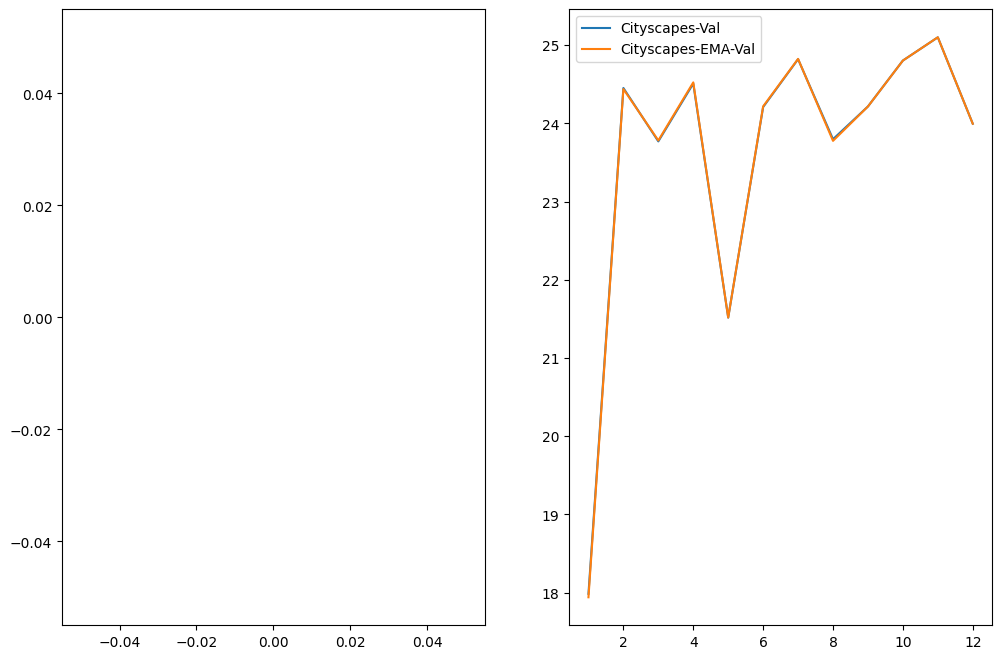

In [98]:
# 50 epochs, lr=1.0e-4, decay factor 0.5, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_05_no_wd_batch_size_4_lr1e-4_warmups2000_cosine5Restarts.txt', print_means=True)

Cityscapes-val-mean-IoU: 21.83419898989899
Cityscapes-val-mean-IoU: 25.016925252525255
Cityscapes-val-mean-IoU: 30.782347474747475
Cityscapes-val-mean-IoU: 27.831449494949492
Cityscapes-val-mean-IoU: 30.928862626262625
Cityscapes-val-mean-IoU: 29.001508080808076
Cityscapes-val-mean-IoU: 30.07271616161616
Cityscapes-val-mean-IoU: 31.26638787878788
Cityscapes-val-mean-IoU: 31.510236363636366
Cityscapes-val-mean-IoU: 31.65767474747475
Cityscapes-val-mean-IoU: 30.35245656565657
Cityscapes-val-mean-IoU: 32.5900494949495
Cityscapes-val-mean-IoU: 33.18702424242424
Cityscapes-val-mean-IoU: 29.332386868686864
Cityscapes-val-mean-IoU: 30.052751515151517
Cityscapes-val-mean-IoU: 29.497296969696972
Cityscapes-val-mean-IoU: 31.03739898989899
Cityscapes-val-mean-IoU: 32.61559191919192
Cityscapes-val-mean-IoU: 30.75403131313131
Cityscapes-val-mean-IoU: 31.392198989898986
Cityscapes-val-mean-IoU: 31.65267777777777
Cityscapes-val-mean-IoU: 29.342451515151517
Cityscapes-val-mean-IoU: 30.67749191919192
C

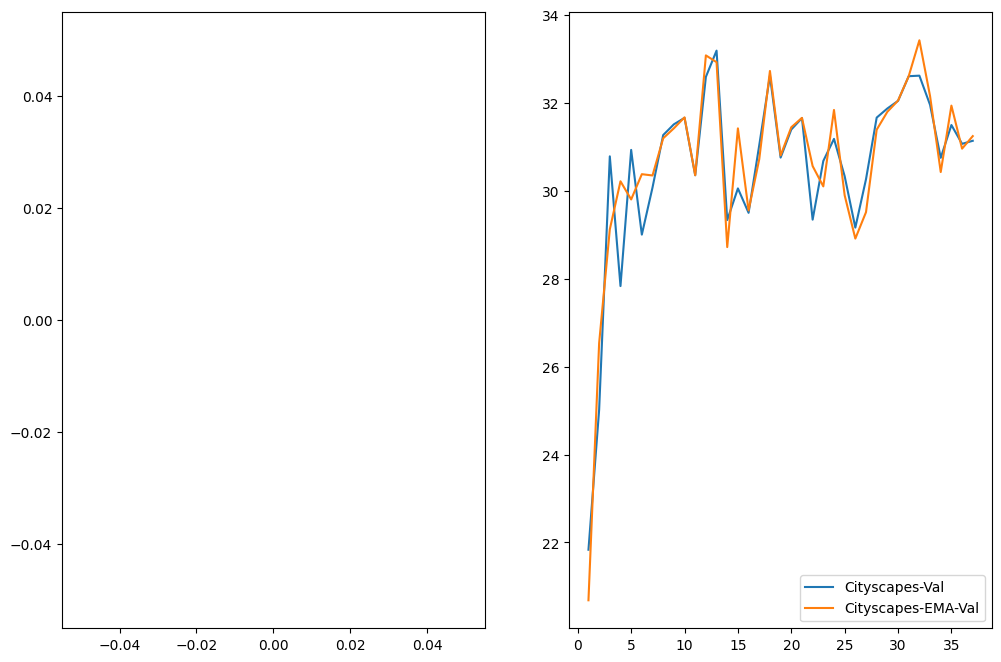

In [101]:
# 50 epochs, lr=1.0e-4, decay factor 0.5, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_09_batch_4_lr_1e0-3_cosineAnnealingWarmRestarts5Times__delayed_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.29636969696969
Cityscapes-val-mean-IoU: 25.38757676767677
Cityscapes-val-mean-IoU: 30.543241414141413
Cityscapes-val-mean-IoU: 27.021945454545452
Cityscapes-val-mean-IoU: 29.23566868686869
Cityscapes-val-mean-IoU: 31.550689898989898
Cityscapes-val-mean-IoU: 30.391964646464643
Cityscapes-val-mean-IoU: 31.305350505050505
Cityscapes-val-mean-IoU: 31.904268686868686
Cityscapes-val-mean-IoU: 31.724545454545456
Cityscapes-val-mean-IoU: 30.74030202020202
Cityscapes-val-mean-IoU: 32.67581919191919
Cityscapes-val-mean-IoU: 32.03424848484849
Cityscapes-val-mean-IoU: 30.9254595959596
Cityscapes-val-mean-IoU: 30.63010808080808
Cityscapes-val-mean-IoU: 30.929518181818178
Cityscapes-val-mean-IoU: 32.55352727272727
Cityscapes-val-mean-IoU: 33.85256464646464
Cityscapes-val-mean-IoU: 32.712820202020204
Cityscapes-val-EMA-mean-IoU: 22.688463636363643
Cityscapes-val-EMA-mean-IoU: 25.50569494949495
Cityscapes-val-EMA-mean-IoU: 29.45688383838384
Cityscapes-val-EMA-mean-IoU: 28.3

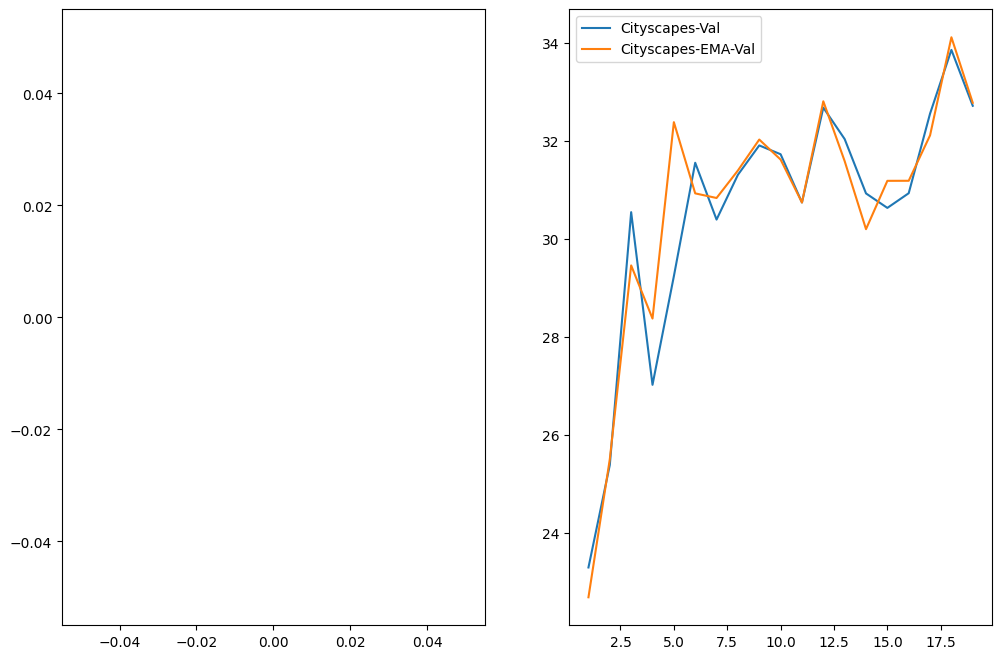

In [126]:
# 50 epochs, lr=1.0e-3, decay factor 0.8, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_08_batch_4_lr_1e0-3_cosineAnnealingWarmRestarts5Times__delayed_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.613941414141415
Cityscapes-val-mean-IoU: 24.724828282828284
Cityscapes-val-mean-IoU: 28.80151414141414
Cityscapes-val-mean-IoU: 26.513417171717172
Cityscapes-val-mean-IoU: 24.36169595959596
Cityscapes-val-mean-IoU: 27.27182121212121
Cityscapes-val-mean-IoU: 27.101023232323236
Cityscapes-val-mean-IoU: 28.555784848484848
Cityscapes-val-mean-IoU: 27.854657575757578
Cityscapes-val-mean-IoU: 28.142072727272733
Cityscapes-val-mean-IoU: 26.99151515151515
Cityscapes-val-mean-IoU: 28.114139393939393
Cityscapes-val-mean-IoU: 31.25641919191919
Cityscapes-val-mean-IoU: 27.96612828282828
Cityscapes-val-mean-IoU: 27.735990909090916
Cityscapes-val-mean-IoU: 28.172888888888885
Cityscapes-val-mean-IoU: 28.55508686868687
Cityscapes-val-mean-IoU: 30.009782828282834
Cityscapes-val-mean-IoU: 26.77590303030303
Cityscapes-val-mean-IoU: 27.959701010101004
Cityscapes-val-mean-IoU: 27.460412121212123
Cityscapes-val-mean-IoU: 26.652358585858583
Cityscapes-val-mean-IoU: 29.262124242424

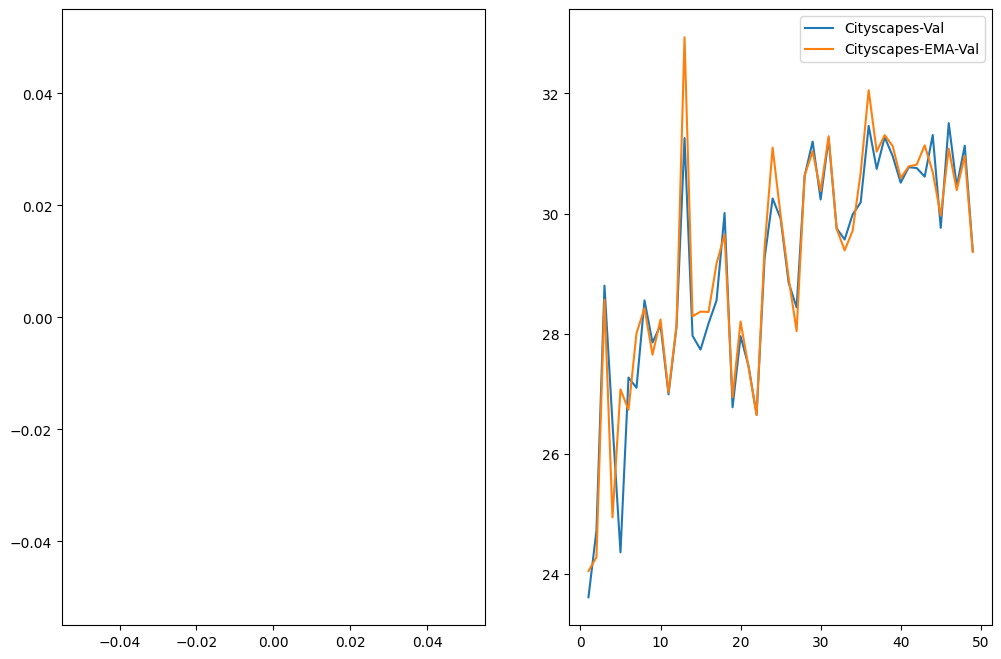

In [127]:
# 50 epochs, lr=1.0e-4, decay fadctor 0.8, batch 8, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_08_batch_8_lr_1e0-3_cosineAnnealingWarmRestarts5Times__delayed_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 23.452834343434347
Cityscapes-val-mean-IoU: 24.669326262626264
Cityscapes-val-mean-IoU: 26.03518181818182
Cityscapes-val-mean-IoU: 32.087841414141415
Cityscapes-val-mean-IoU: 30.63113737373737
Cityscapes-val-mean-IoU: 31.988931313131317
Cityscapes-val-mean-IoU: 29.630857575757577
Cityscapes-val-mean-IoU: 31.316830303030297
Cityscapes-val-mean-IoU: 31.810552525252522
Cityscapes-val-mean-IoU: 31.541136363636365
Cityscapes-val-mean-IoU: 30.52584848484848
Cityscapes-val-mean-IoU: 33.743026262626266
Cityscapes-val-mean-IoU: 31.979740404040403
Cityscapes-val-mean-IoU: 33.00806262626263
Cityscapes-val-mean-IoU: 31.555436363636368
Cityscapes-val-mean-IoU: 29.697884848484843
Cityscapes-val-mean-IoU: 29.105500000000006
Cityscapes-val-mean-IoU: 32.72349292929293
Cityscapes-val-mean-IoU: 31.449459595959592
Cityscapes-val-mean-IoU: 31.680670707070707
Cityscapes-val-mean-IoU: 31.367338383838383
Cityscapes-val-mean-IoU: 31.394537373737375
Cityscapes-val-mean-IoU: 28.885610101

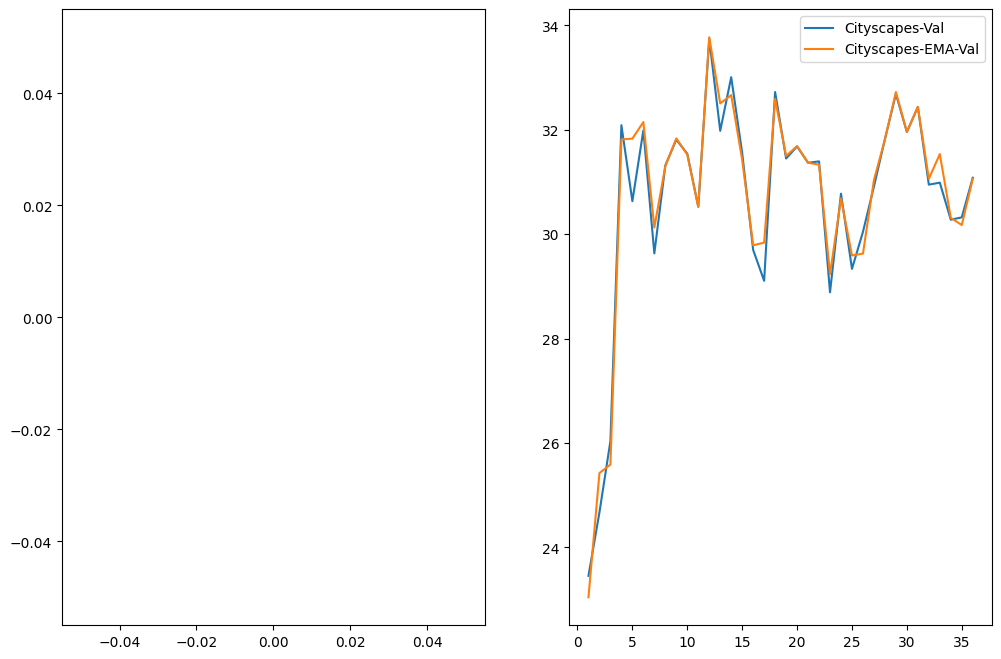

In [58]:
# 50 epochs, lr=1.0e-4, decay fadctor 0.5, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_05_batch_4_lr_1e0-3_cosineAnnealingWarmRestarts5Times_delayed_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 24.575081818181822
Cityscapes-val-mean-IoU: 24.64728080808081
Cityscapes-val-mean-IoU: 28.06123131313131
Cityscapes-val-mean-IoU: 31.97537777777778
Cityscapes-val-mean-IoU: 28.593445454545453
Cityscapes-val-mean-IoU: 30.377749494949494
Cityscapes-val-mean-IoU: 29.62706565656566
Cityscapes-val-mean-IoU: 31.25714747474748
Cityscapes-val-mean-IoU: 31.508868686868688
Cityscapes-val-mean-IoU: 32.44077171717172
Cityscapes-val-mean-IoU: 31.381971717171712
Cityscapes-val-mean-IoU: 29.972715151515153
Cityscapes-val-mean-IoU: 30.47748686868687
Cityscapes-val-mean-IoU: 27.512128282828282
Cityscapes-val-mean-IoU: 27.682992929292922
Cityscapes-val-mean-IoU: 27.35690505050505
Cityscapes-val-mean-IoU: 31.160206060606065
Cityscapes-val-mean-IoU: 30.844841414141417
Cityscapes-val-EMA-mean-IoU: 23.01568484848485
Cityscapes-val-EMA-mean-IoU: 27.052049494949497
Cityscapes-val-EMA-mean-IoU: 28.391333333333332
Cityscapes-val-EMA-mean-IoU: 30.319732323232323
Cityscapes-val-EMA-mean-I

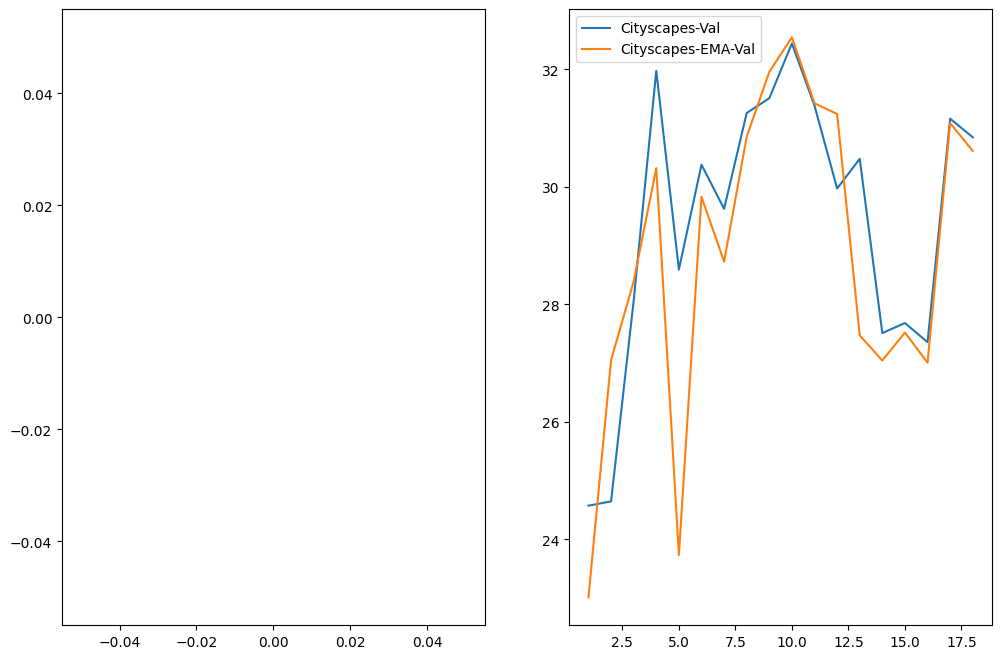

In [186]:
# 50 epochs, lr=5.0e-3, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_095_batch_4_lr_5e0-3_cosineAnnealingWarmRestarts5Times_delayed_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 21.044156565656568
Cityscapes-val-mean-IoU: 22.79414848484848
Cityscapes-val-mean-IoU: 24.013801010101005
Cityscapes-val-mean-IoU: 25.64041212121212
Cityscapes-val-mean-IoU: 26.95377474747475
Cityscapes-val-mean-IoU: 28.97483131313131
Cityscapes-val-mean-IoU: 28.02539494949495
Cityscapes-val-mean-IoU: 26.907821212121213
Cityscapes-val-mean-IoU: 26.858554545454545
Cityscapes-val-mean-IoU: 29.293291919191923
Cityscapes-val-mean-IoU: 28.010197979797983
Cityscapes-val-mean-IoU: 29.77098585858586
Cityscapes-val-mean-IoU: 31.88419393939394
Cityscapes-val-mean-IoU: 27.945660606060603
Cityscapes-val-mean-IoU: 29.144172727272725
Cityscapes-val-mean-IoU: 29.20550909090909
Cityscapes-val-mean-IoU: 29.26196060606061
Cityscapes-val-mean-IoU: 31.30450808080808
Cityscapes-val-mean-IoU: 28.683751515151513
Cityscapes-val-mean-IoU: 28.313965656565653
Cityscapes-val-mean-IoU: 28.916290909090904
Cityscapes-val-mean-IoU: 27.98793232323232
Cityscapes-val-mean-IoU: 30.626321212121212

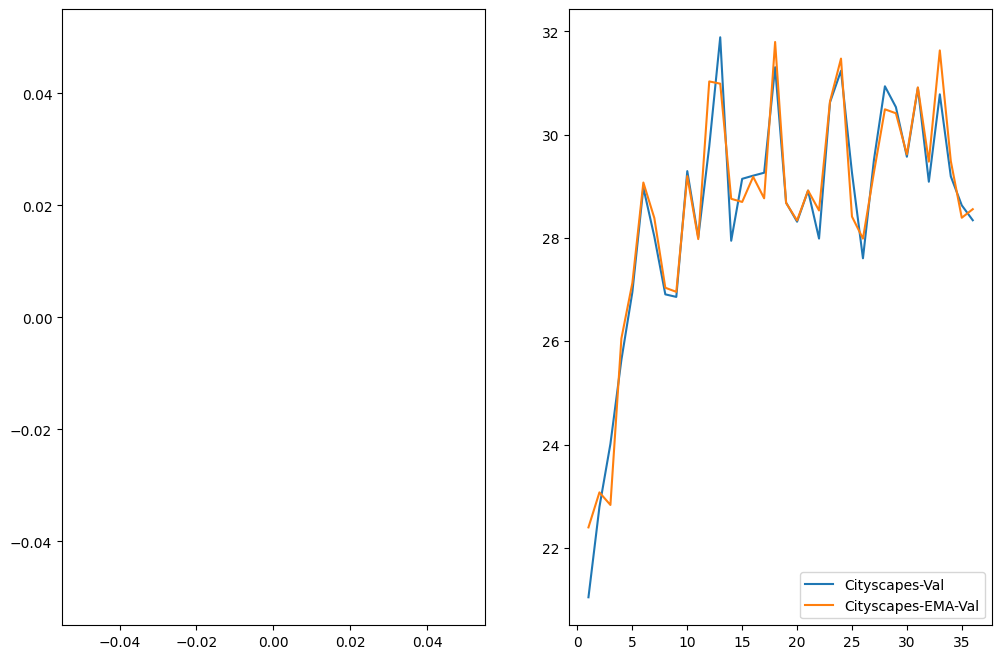

In [185]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_095_no_wd_batch_size_4_lr5e-4_warmups2000_cosine5Restarts_wd_1e-3.txt', print_means=True)

Cityscapes-val-mean-IoU: 31.291015151515147
Cityscapes-val-mean-IoU: 26.88431313131313
Cityscapes-val-mean-IoU: 33.03434545454545
Cityscapes-val-mean-IoU: 34.932791919191914
Cityscapes-val-mean-IoU: 32.593710101010096
Cityscapes-val-mean-IoU: 28.0499303030303
Cityscapes-val-mean-IoU: 31.302971717171715
Cityscapes-val-mean-IoU: 35.08753333333333
Cityscapes-val-mean-IoU: 31.249649494949498
Cityscapes-val-mean-IoU: 31.895308080808086
Cityscapes-val-mean-IoU: 32.90987676767677
Cityscapes-val-mean-IoU: 32.08571717171717
Cityscapes-val-mean-IoU: 32.641996969696976
Cityscapes-val-mean-IoU: 32.59799797979798
Cityscapes-val-mean-IoU: 32.46590707070707
Cityscapes-val-mean-IoU: 32.00358585858586
Cityscapes-val-EMA-mean-IoU: 30.418335353535358
Cityscapes-val-EMA-mean-IoU: 27.248662626262632
Cityscapes-val-EMA-mean-IoU: 31.55014343434343
Cityscapes-val-EMA-mean-IoU: 31.807598989898988
Cityscapes-val-EMA-mean-IoU: 32.535650505050505
Cityscapes-val-EMA-mean-IoU: 28.37022323232323
Cityscapes-val-EMA-m

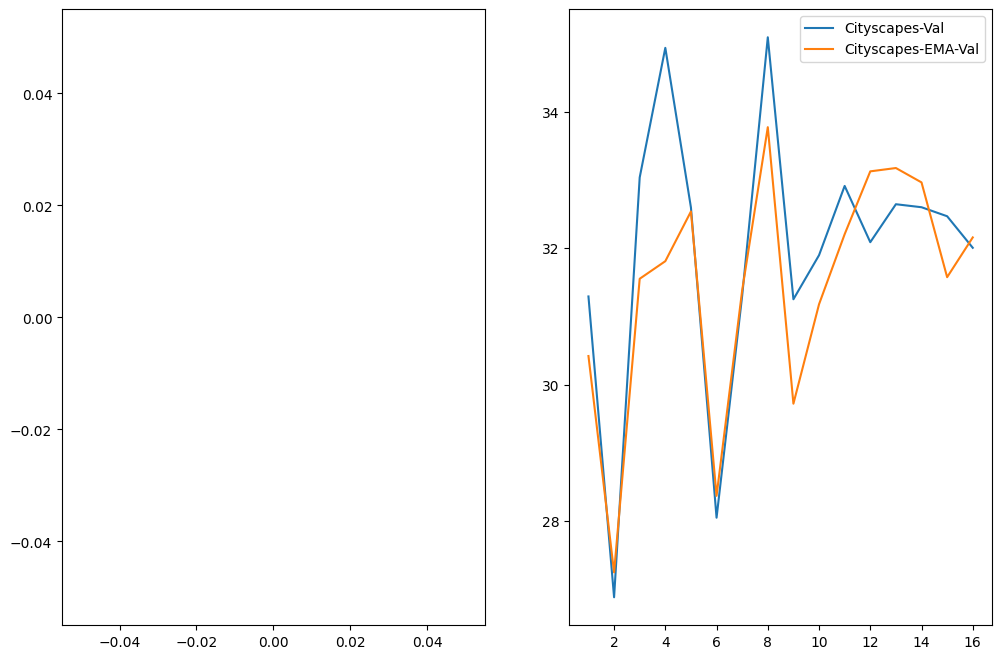

In [187]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_099_batch_4_lr_1e0-3_randomBrightnessContrastCrop_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.12385858585858
Cityscapes-val-mean-IoU: 26.058993939393936
Cityscapes-val-mean-IoU: 28.489196969696966
Cityscapes-val-mean-IoU: 31.001588888888886
Cityscapes-val-mean-IoU: 29.118352525252526
Cityscapes-val-mean-IoU: 31.02766666666666
Cityscapes-val-mean-IoU: 29.933710101010103
Cityscapes-val-mean-IoU: 29.891254545454544
Cityscapes-val-mean-IoU: 29.47635454545454
Cityscapes-val-mean-IoU: 30.15929090909091
Cityscapes-val-mean-IoU: 31.030814141414147
Cityscapes-val-mean-IoU: 29.93212828282829
Cityscapes-val-mean-IoU: 33.097758585858585
Cityscapes-val-mean-IoU: 31.005127272727275
Cityscapes-val-mean-IoU: 29.268219191919187
Cityscapes-val-mean-IoU: 28.39388787878788
Cityscapes-val-mean-IoU: 31.460988888888885
Cityscapes-val-mean-IoU: 31.87778484848485
Cityscapes-val-mean-IoU: 31.60762828282828
Cityscapes-val-mean-IoU: 32.81616565656566
Cityscapes-val-mean-IoU: 31.568582828282832
Cityscapes-val-mean-IoU: 31.769827272727277
Cityscapes-val-mean-IoU: 27.1616272727272

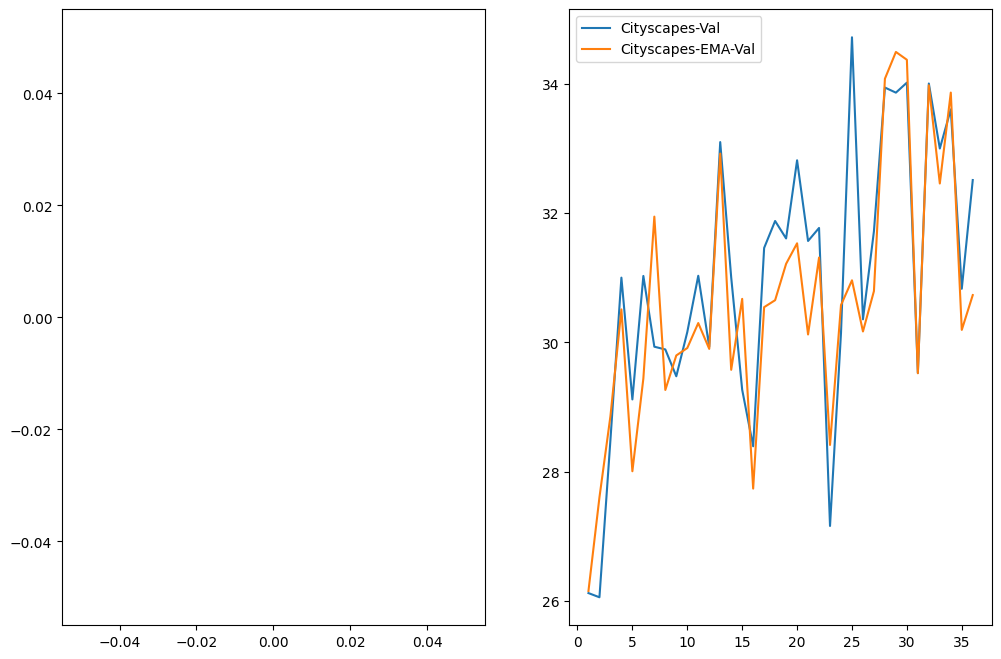

In [189]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_099_no_wd_batch_size_4_lr1e-3_randomCropBrightnessContrastHFlip.txt', print_means=True)

Cityscapes-val-mean-IoU: 28.186715151515145
Cityscapes-val-mean-IoU: 25.274468686868687
Cityscapes-val-mean-IoU: 30.32356161616161
Cityscapes-val-mean-IoU: 30.76584444444444
Cityscapes-val-mean-IoU: 28.8269202020202
Cityscapes-val-mean-IoU: 29.1907898989899
Cityscapes-val-mean-IoU: 29.376222222222214
Cityscapes-val-mean-IoU: 31.551679797979798
Cityscapes-val-mean-IoU: 30.978522222222225
Cityscapes-val-mean-IoU: 31.289228282828283
Cityscapes-val-mean-IoU: 28.01336464646465
Cityscapes-val-mean-IoU: 28.87413333333333
Cityscapes-val-mean-IoU: 30.38235353535353
Cityscapes-val-mean-IoU: 29.106480808080807
Cityscapes-val-mean-IoU: 28.84146666666667
Cityscapes-val-mean-IoU: 29.4380606060606
Cityscapes-val-mean-IoU: 30.04183737373737
Cityscapes-val-mean-IoU: 32.8290898989899
Cityscapes-val-mean-IoU: 29.515242424242423
Cityscapes-val-mean-IoU: 32.92875252525253
Cityscapes-val-mean-IoU: 30.482102020202017
Cityscapes-val-mean-IoU: 28.430647474747477
Cityscapes-val-mean-IoU: 28.4316898989899
Citysc

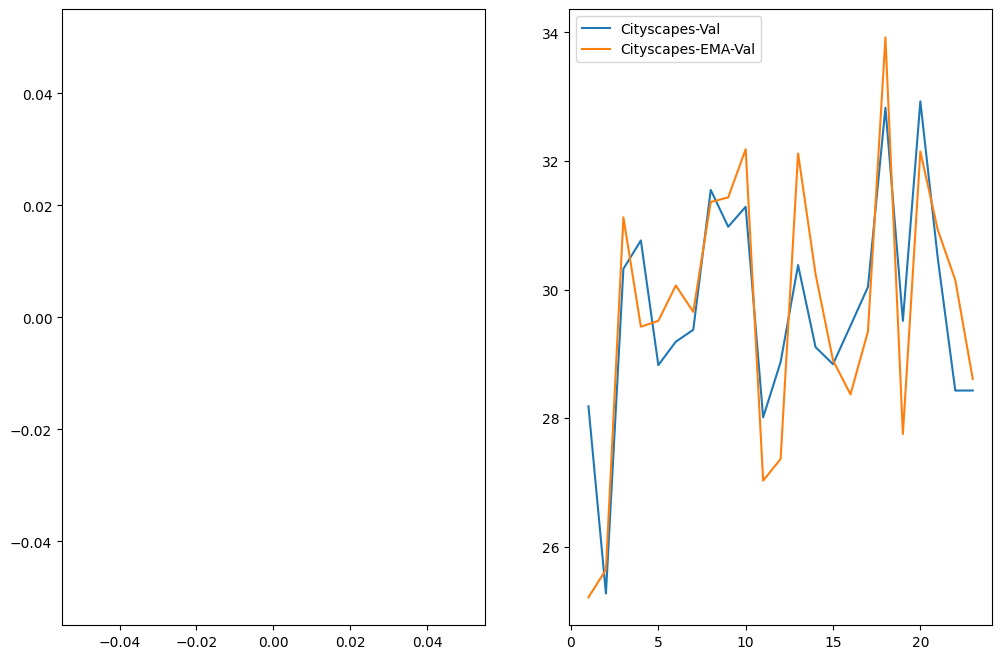

In [208]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.99, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_099_batch_4_lr_1e0-3_randomBrightnessContrastCropElastic_SGD.txt', print_means=True)

Cityscapes-val-mean-IoU: 30.429706060606062
Cityscapes-val-mean-IoU: 27.356860606060604
Cityscapes-val-mean-IoU: 29.955644444444438
Cityscapes-val-mean-IoU: 28.669275757575765
Cityscapes-val-mean-IoU: 29.107830303030305
Cityscapes-val-mean-IoU: 31.17433232323232
Cityscapes-val-mean-IoU: 33.018669696969695
Cityscapes-val-mean-IoU: 33.37551818181818
Cityscapes-val-mean-IoU: 32.54092828282828
Cityscapes-val-mean-IoU: 32.75502424242424
Cityscapes-val-mean-IoU: 32.876807070707066
Cityscapes-val-mean-IoU: 34.06197474747475
Cityscapes-val-mean-IoU: 32.94694444444444
Cityscapes-val-mean-IoU: 31.805852525252526
Cityscapes-val-mean-IoU: 32.21122929292929
Cityscapes-val-mean-IoU: 31.81622727272728
Cityscapes-val-mean-IoU: 32.65941717171717
Cityscapes-val-mean-IoU: 32.76068888888888
Cityscapes-val-mean-IoU: 33.77468686868687
Cityscapes-val-mean-IoU: 34.1153202020202
Cityscapes-val-mean-IoU: 32.0034
Cityscapes-val-mean-IoU: 32.075384848484845
Cityscapes-val-mean-IoU: 34.71462121212121
Cityscapes-va

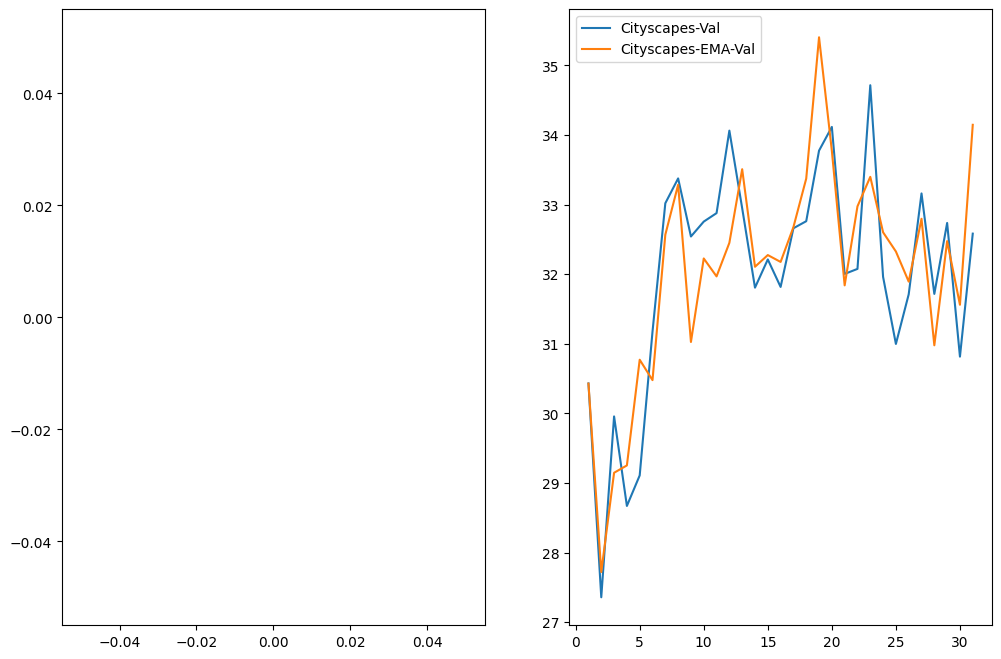

In [3]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, weight decay = 0, randomCrop, randomBrightnessContrast SGD
visualize_scores('logs/log_deeplab_wa_095_batch_4_lr_1e0-3_randomBrightness100PercentContrastCrop_SGD.txt', print_means=True)

In [14]:
ignore_label = 255

trainid_to_trainid = {
        0: ignore_label,  # void
        1: 10,            # sky
        2: 2,             # building
        3: 0,             # road
        4: 1,             # sidewalk
        5: 4,             # fence
        6: 8,             # vegetation
        7: 5,             # pole
        8: 13,            # car
        9: 7,             # traffic sign
        10: 11,           # pedestrian - person
        11: 18,           # bicycle
        12: 17,           # motorcycle
        13: ignore_label, # parking-slot
        14: ignore_label, # road-work
        15: 6,            # traffic light
        16: 9,            # terrain
        17: 12,           # rider
        18: 14,           # truck
        19: 15,           # bus
        20: 16,           # train
        21: 3,            # wall
        22: ignore_label  # Lanemarking
        }

In [15]:
import glob
import imageio
import os
import torch
import numpy as np

# calculating class weights
masks = glob.glob(f'./synthia/GT/LABELS/*.png')
print(len(masks))

num_classes = 19
total_number_of_samples_per_class = {str(i):0 for i in range(num_classes)}
total_number_of_samples_per_class["sum_of_pixels"] = 0

for index, mask in enumerate(masks):
    mask = np.asarray(imageio.imread(masks[index], format='PNG-FI'))[:, :, 0]

    mask_copy = mask.copy()
    for k, v in trainid_to_trainid.items():
        mask_copy[mask == k] = v

    mask = mask_copy

    # add total number of pixels to data structure
    total_number_of_samples_per_class["sum_of_pixels"] = total_number_of_samples_per_class["sum_of_pixels"] + mask.shape[0] * mask.shape[1]

    for i in range(num_classes):
        total_number_of_samples_per_class[str(i)] = total_number_of_samples_per_class[str(i)] + np.sum(mask == i)
    
    if index > 0 and index % 100 == 0:
        print(f'Progress: {index+1}/{len(masks)}')


9400


/tmp/ipykernel_305011/3278043786.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = np.asarray(imageio.imread(masks[index], format='PNG-FI'))[:, :, 0]


Progress: 101/9400
Progress: 201/9400
Progress: 301/9400
Progress: 401/9400
Progress: 501/9400
Progress: 601/9400
Progress: 701/9400
Progress: 801/9400
Progress: 901/9400
Progress: 1001/9400
Progress: 1101/9400
Progress: 1201/9400
Progress: 1301/9400
Progress: 1401/9400
Progress: 1501/9400
Progress: 1601/9400
Progress: 1701/9400
Progress: 1801/9400
Progress: 1901/9400
Progress: 2001/9400
Progress: 2101/9400
Progress: 2201/9400
Progress: 2301/9400
Progress: 2401/9400
Progress: 2501/9400
Progress: 2601/9400
Progress: 2701/9400
Progress: 2801/9400
Progress: 2901/9400
Progress: 3001/9400
Progress: 3101/9400
Progress: 3201/9400
Progress: 3301/9400
Progress: 3401/9400
Progress: 3501/9400
Progress: 3601/9400
Progress: 3701/9400
Progress: 3801/9400
Progress: 3901/9400
Progress: 4001/9400
Progress: 4101/9400
Progress: 4201/9400
Progress: 4301/9400
Progress: 4401/9400
Progress: 4501/9400
Progress: 4601/9400
Progress: 4701/9400
Progress: 4801/9400
Progress: 4901/9400
Progress: 5001/9400
Progress:

In [16]:
print(total_number_of_samples_per_class)

{'0': 1687064972, '1': 1765845929, '2': 2678738694, '3': 24622303, '4': 24498071, '5': 94956481, '6': 3560107, '7': 9260697, '8': 942663593, '9': 0, '10': 626393683, '11': 388225700, '12': 42905829, '13': 371159980, '14': 0, '15': 139689194, '16': 0, '17': 18930213, '18': 20059346, 'sum_of_pixels': 9144320000}


In [8]:
probs_per_class = torch.zeros(19)

for k, v in total_number_of_samples_per_class.items():
    probs_per_class[int(k)] = v / total_number_of_samples_per_class['sum_of_pixels']




ValueError: invalid literal for int() with base 10: 'sum_of_pixels'

In [6]:
print(probs_per_class.dtype)

torch.float32


In [10]:
print(probs_per_class)

tensor([0.0125, 0.0685, 0.2929, 0.1845, 0.1931, 0.0027, 0.1031, 0.0104, 0.0406,
        0.0010, 0.0425, 0.0022, 0.0021, 0.0000, 0.0067, 0.0004, 0.0000, 0.0047,
        0.0000])


In [12]:
import glob
import imageio
import os
import torch
import numpy as np

mask_path = '/home/appuser/pytorch/synthia/GT/LABELS/0000000.png'

mask = np.asarray(imageio.imread(mask_path, format='PNG-FI'))[:, :, 0]

print(np.unique(mask))

[ 0  1  2  3  4  5  6  7  8 10 11 12 14 17 21]


/tmp/ipykernel_305011/2785352014.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = np.asarray(imageio.imread(mask_path, format='PNG-FI'))[:, :, 0]


Cityscapes-val-mean-IoU: 30.099374348697392
Cityscapes-val-mean-IoU: 31.66904448897796
Cityscapes-val-mean-IoU: 30.431307615230466
Cityscapes-val-mean-IoU: 31.742112224448896
Cityscapes-val-mean-IoU: 29.58816753507014
Cityscapes-val-mean-IoU: 29.836273547094187
Cityscapes-val-mean-IoU: 32.29710521042084
Cityscapes-val-mean-IoU: 32.843315831663325
Cityscapes-val-mean-IoU: 33.67790681362726
Cityscapes-val-mean-IoU: 33.43626492985972
Cityscapes-val-mean-IoU: 31.020909018036072
Cityscapes-val-mean-IoU: 31.744298196392787
Cityscapes-val-mean-IoU: 32.36638416833667
Cityscapes-val-mean-IoU: 31.86149378757515
Cityscapes-val-mean-IoU: 30.64650220440882
Cityscapes-val-mean-IoU: 32.59934168336673
Cityscapes-val-mean-IoU: 32.926739278557115
Cityscapes-val-mean-IoU: 35.2414248496994
Cityscapes-val-mean-IoU: 34.55950080160321
Cityscapes-val-mean-IoU: 35.03104669338678
Cityscapes-val-mean-IoU: 35.96231182364729
Cityscapes-val-mean-IoU: 33.49422905811624
Cityscapes-val-mean-IoU: 27.799251503006015
Cit

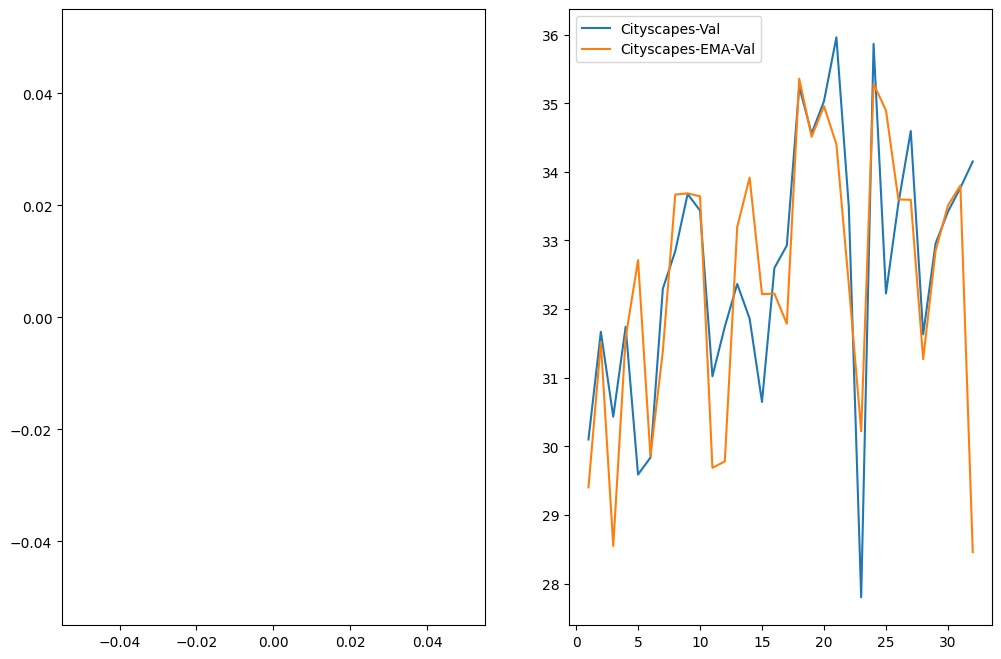

In [123]:
# 50 epochs, lr=1.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_095_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_fixed2.txt', print_means=True)

Cityscapes-val-mean-IoU: 30.099374348697392
Cityscapes-val-mean-IoU: 31.66904448897796
Cityscapes-val-mean-IoU: 30.431307615230466
Cityscapes-val-mean-IoU: 31.742112224448896
Cityscapes-val-mean-IoU: 29.58816753507014
Cityscapes-val-mean-IoU: 29.836273547094187
Cityscapes-val-mean-IoU: 32.29710521042084
Cityscapes-val-mean-IoU: 32.843315831663325
Cityscapes-val-mean-IoU: 33.67790681362726
Cityscapes-val-mean-IoU: 33.43626492985972
Cityscapes-val-mean-IoU: 31.020909018036072
Cityscapes-val-mean-IoU: 31.744298196392787
Cityscapes-val-mean-IoU: 32.36638416833667
Cityscapes-val-mean-IoU: 31.86149378757515
Cityscapes-val-mean-IoU: 30.64650220440882
Cityscapes-val-mean-IoU: 32.59934168336673
Cityscapes-val-mean-IoU: 32.926739278557115
Cityscapes-val-mean-IoU: 35.2414248496994
Cityscapes-val-mean-IoU: 34.55950080160321
Cityscapes-val-mean-IoU: 35.03104669338678
Cityscapes-val-mean-IoU: 35.96231182364729
Cityscapes-val-mean-IoU: 33.49422905811624
Cityscapes-val-mean-IoU: 27.799251503006015
Cit

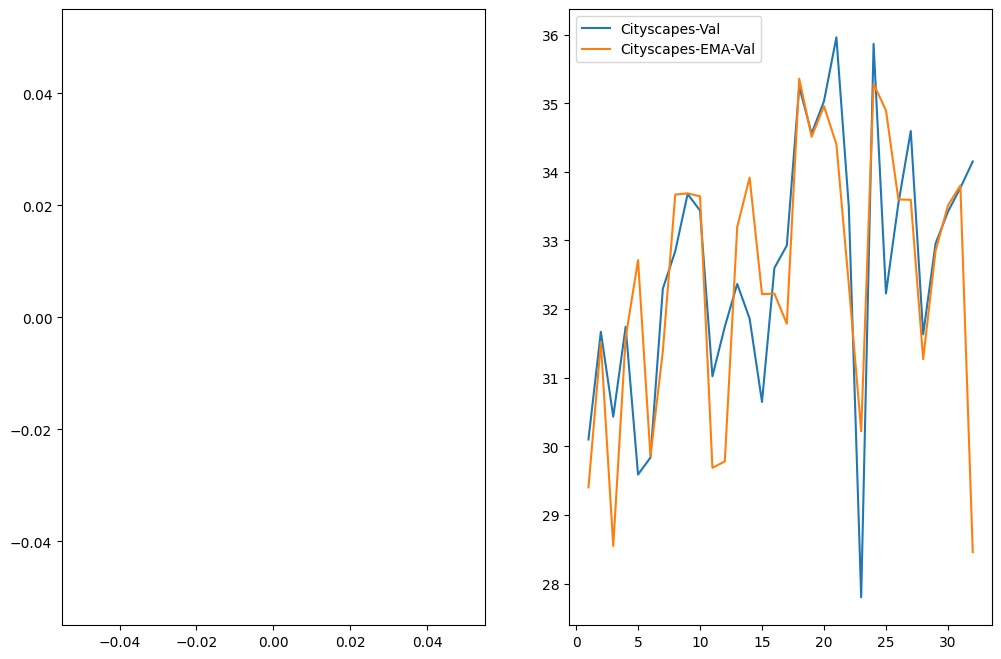

In [79]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_095_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_fixed2.txt', print_means=True)

Cityscapes-val-mean-IoU: 26.892639478957914
Cityscapes-val-mean-IoU: 26.7319124248497
Cityscapes-val-mean-IoU: 29.755431262525054
Cityscapes-val-mean-IoU: 29.585269739478964
Cityscapes-val-mean-IoU: 31.284741282565133
Cityscapes-val-mean-IoU: 29.52571643286573
Cityscapes-val-mean-IoU: 30.04145571142285
Cityscapes-val-mean-IoU: 31.622062124248497
Cityscapes-val-mean-IoU: 31.185510621242486
Cityscapes-val-mean-IoU: 30.32768156312625
Cityscapes-val-mean-IoU: 31.647631863727458
Cityscapes-val-mean-IoU: 29.760760921843687
Cityscapes-val-mean-IoU: 31.033942484969938
Cityscapes-val-mean-IoU: 30.775817034068133
Cityscapes-val-mean-IoU: 34.023312224448894
Cityscapes-val-mean-IoU: 32.664027655310626
Cityscapes-val-mean-IoU: 34.948714829659316
Cityscapes-val-mean-IoU: 34.23724809619239
Cityscapes-val-mean-IoU: 34.53414268537074
Cityscapes-val-mean-IoU: 32.66743507014028
Cityscapes-val-mean-IoU: 34.62581102204409
Cityscapes-val-mean-IoU: 31.94505210420842
Cityscapes-val-mean-IoU: 33.33900981963928

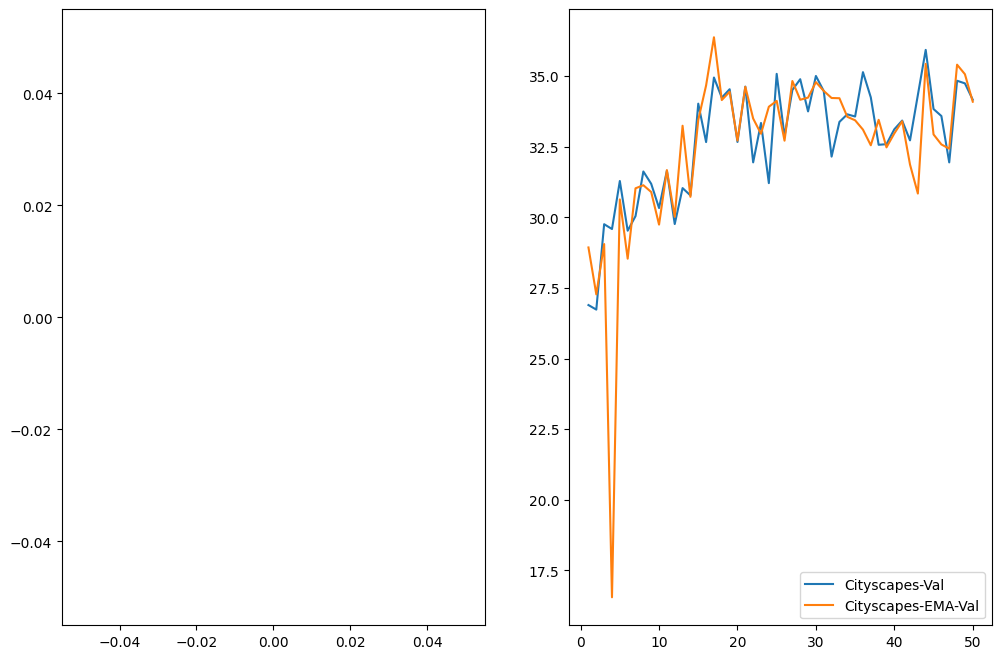

In [113]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.95, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_095_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 27.76677975951904
Cityscapes-val-mean-IoU: 28.225481362725453
Cityscapes-val-mean-IoU: 29.345497194388777
Cityscapes-val-mean-IoU: 32.00402665330661
Cityscapes-val-mean-IoU: 34.59287014028056
Cityscapes-val-mean-IoU: 31.54087995991984
Cityscapes-val-mean-IoU: 30.754584368737476
Cityscapes-val-mean-IoU: 32.46235250501002
Cityscapes-val-mean-IoU: 35.13604689378757
Cityscapes-val-mean-IoU: 34.39077134268537
Cityscapes-val-mean-IoU: 32.96058436873747
Cityscapes-val-mean-IoU: 35.24395651302605
Cityscapes-val-mean-IoU: 33.48131723446894
Cityscapes-val-mean-IoU: 35.97120100200401
Cityscapes-val-mean-IoU: 34.3375883767535
Cityscapes-val-mean-IoU: 32.60378176352706
Cityscapes-val-mean-IoU: 33.928189378757516
Cityscapes-val-mean-IoU: 33.46605931863728
Cityscapes-val-mean-IoU: 33.82138957915831
Cityscapes-val-mean-IoU: 32.35426092184368
Cityscapes-val-mean-IoU: 33.779168737474954
Cityscapes-val-mean-IoU: 32.59046613226453
Cityscapes-val-mean-IoU: 33.09700360721444
Citysca

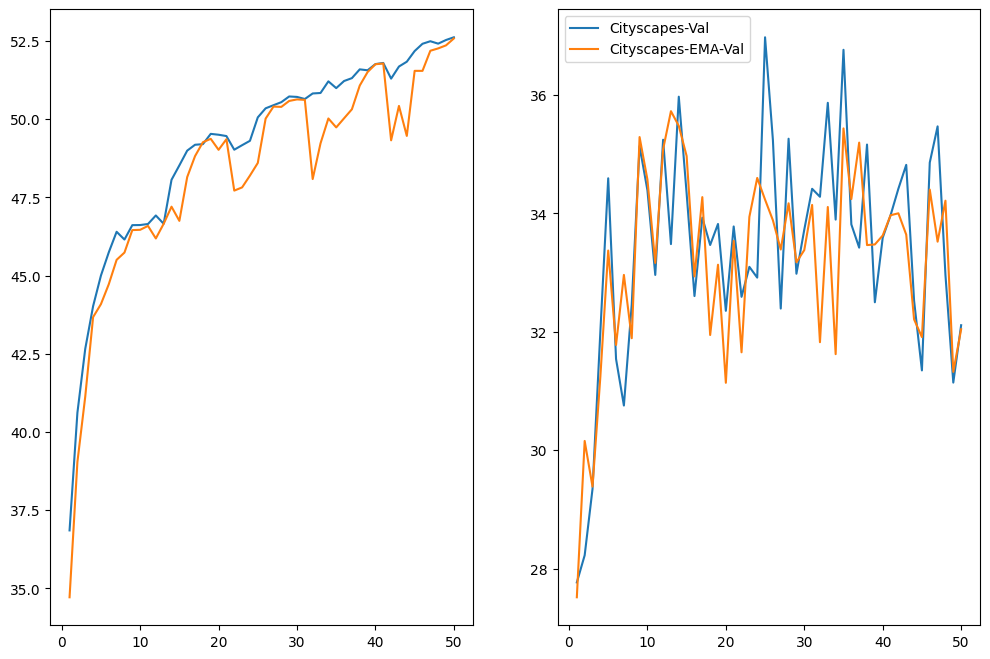

In [115]:
# 50 epochs, lr=5.0e-4, decay fadctor 0.99, batch 4, 2000 no warmup-steps, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_99_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 29.68703627254509
Cityscapes-val-mean-IoU: 28.318533867735468
Cityscapes-val-mean-IoU: 29.861941683366734
Cityscapes-val-mean-IoU: 30.140991783567134
Cityscapes-val-mean-IoU: 28.997065130260516
Cityscapes-val-mean-IoU: 34.00338557114229
Cityscapes-val-mean-IoU: 30.98632965931864
Cityscapes-val-mean-IoU: 31.76792244488978
Cityscapes-val-mean-IoU: 33.3435124248497
Cityscapes-val-mean-IoU: 32.92324288577154
Cityscapes-val-mean-IoU: 32.206504609218435
Cityscapes-val-mean-IoU: 33.53262965931863
Cityscapes-val-mean-IoU: 31.865732064128256
Cityscapes-val-mean-IoU: 34.88387735470941
Cityscapes-val-mean-IoU: 35.331707615230464
Cityscapes-val-mean-IoU: 32.533201603206415
Cityscapes-val-mean-IoU: 33.90599198396794
Cityscapes-val-mean-IoU: 34.228291983967935
Cityscapes-val-mean-IoU: 35.24870320641282
Cityscapes-val-mean-IoU: 33.555877354709416
Cityscapes-val-mean-IoU: 34.466638877755514
Cityscapes-val-mean-IoU: 33.59222645290581
Cityscapes-val-mean-IoU: 34.971758116232465


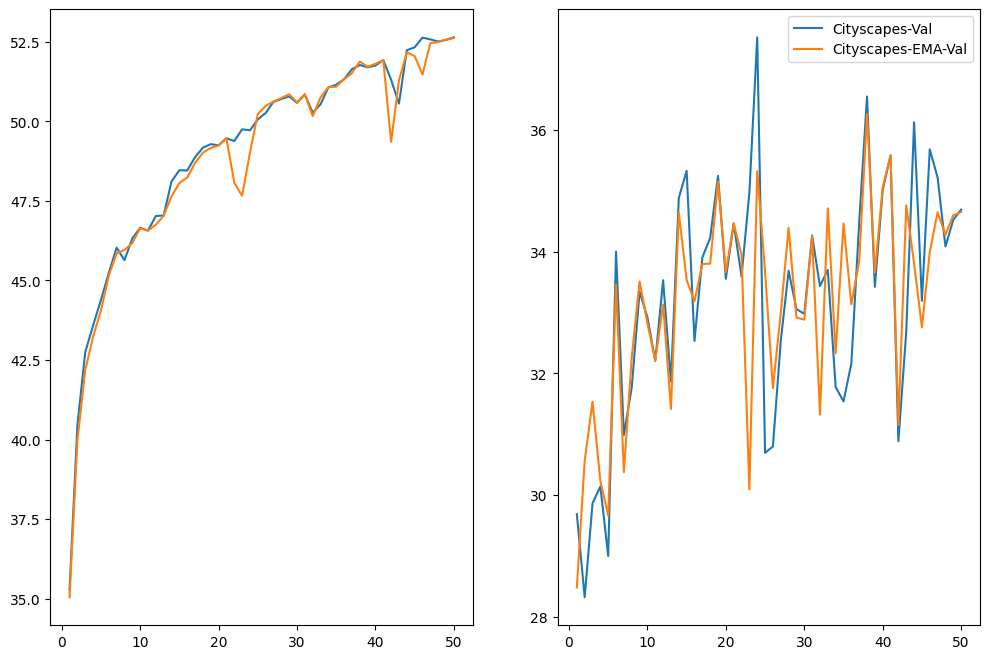

In [116]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.9, batch 4, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_09_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 31.40783527054108
Cityscapes-val-mean-IoU: 29.48082244488978
Cityscapes-val-mean-IoU: 30.505174549098196
Cityscapes-val-mean-IoU: 30.630417034068138
Cityscapes-val-mean-IoU: 32.07445470941884
Cityscapes-val-mean-IoU: 33.16904849699399
Cityscapes-val-mean-IoU: 30.53583907815631
Cityscapes-val-mean-IoU: 34.19066432865731
Cityscapes-val-mean-IoU: 34.31929759519038
Cityscapes-val-mean-IoU: 31.823201803607216
Cityscapes-val-mean-IoU: 32.45824008016032
Cityscapes-val-mean-IoU: 33.104005210420844
Cityscapes-val-mean-IoU: 32.46637595190381
Cityscapes-val-mean-IoU: 35.53918136272545
Cityscapes-val-mean-IoU: 32.5226503006012
Cityscapes-val-mean-IoU: 33.431905811623245
Cityscapes-val-mean-IoU: 32.62857254509018
Cityscapes-val-mean-IoU: 33.1060625250501
Cityscapes-val-mean-IoU: 33.0942625250501
Cityscapes-val-mean-IoU: 33.04495551102204
Cityscapes-val-mean-IoU: 34.02248517034068
Cityscapes-val-mean-IoU: 35.346348296593185
Cityscapes-val-mean-IoU: 33.78095691382765
Cityscap

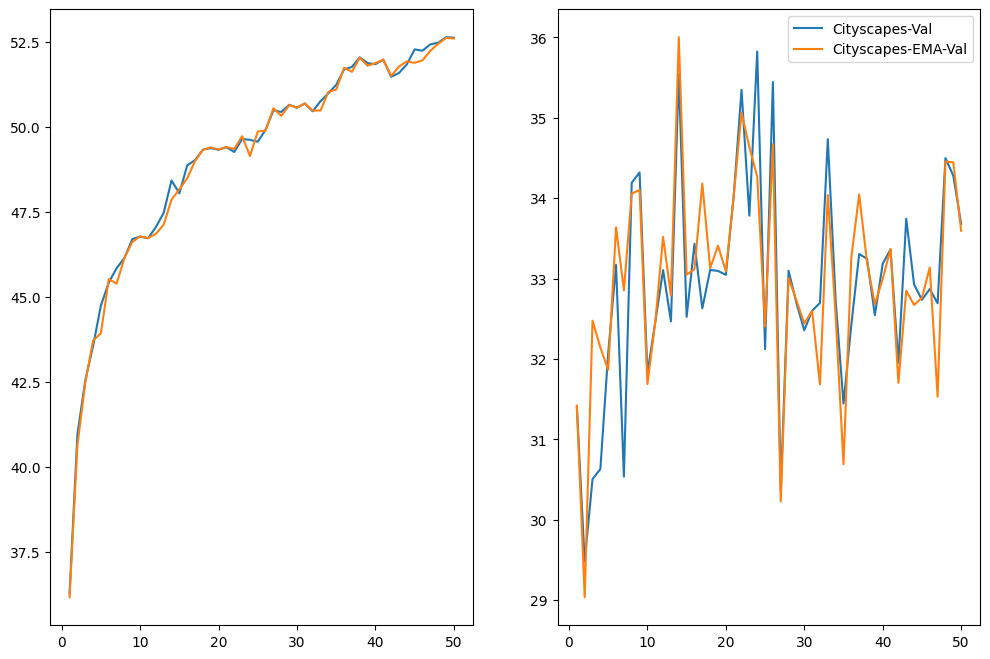

In [117]:
# 50 epochs, lr=1.0e-4, decay fadctor 0.8, batch 4, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_08_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 30.958706613226454
Cityscapes-val-mean-IoU: 27.633639278557112
Cityscapes-val-mean-IoU: 32.58318236472946
Cityscapes-val-mean-IoU: 28.546297194388778
Cityscapes-val-mean-IoU: 30.3453496993988
Cityscapes-val-mean-IoU: 30.758896993987978
Cityscapes-val-mean-IoU: 30.95683386773547
Cityscapes-val-mean-IoU: 28.836537074148296
Cityscapes-val-mean-IoU: 32.64027214428858
Cityscapes-val-mean-IoU: 31.433555110220443
Cityscapes-val-mean-IoU: 30.976587775551103
Cityscapes-val-mean-IoU: 30.637821242484968
Cityscapes-val-mean-IoU: 31.889081963927858
Cityscapes-val-mean-IoU: 34.24349398797595
Cityscapes-val-mean-IoU: 30.173861923847696
Cityscapes-val-mean-IoU: 30.757634068136273
Cityscapes-val-mean-IoU: 33.2228126252505
Cityscapes-val-mean-IoU: 30.659186773547095
Cityscapes-val-mean-IoU: 32.89117194388777
Cityscapes-val-mean-IoU: 30.86959378757515
Cityscapes-val-mean-IoU: 31.973293587174346
Cityscapes-val-mean-IoU: 31.238983166332666
Cityscapes-val-mean-IoU: 32.16752044088176

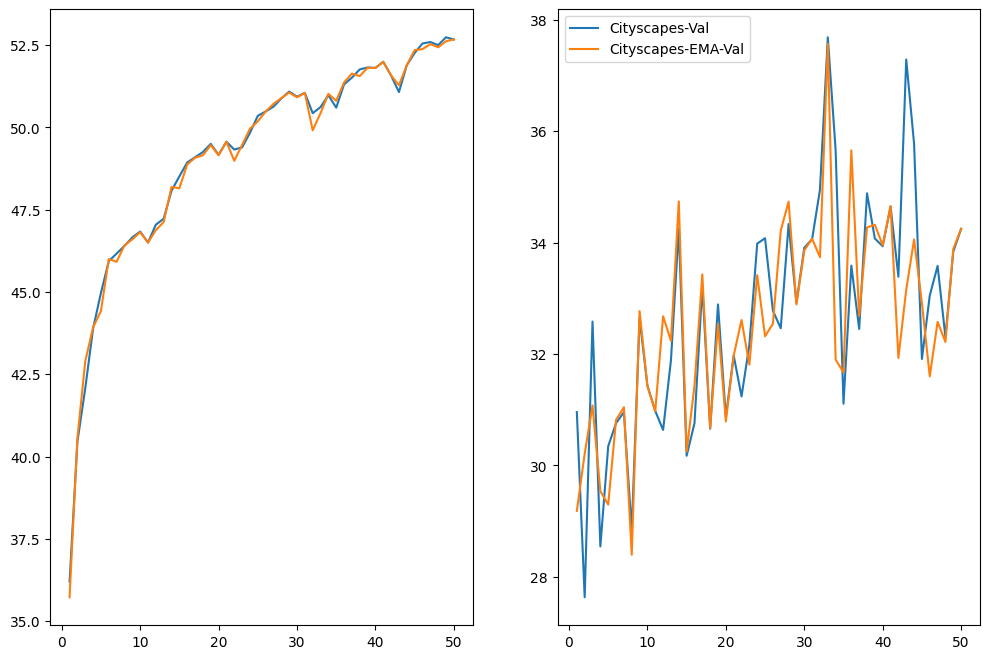

In [129]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.7, batch 4, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_07_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 29.156610821643284
Cityscapes-val-mean-IoU: 29.56572224448898
Cityscapes-val-mean-IoU: 30.691535070140283
Cityscapes-val-mean-IoU: 30.354460521042085
Cityscapes-val-mean-IoU: 30.39624649298597
Cityscapes-val-mean-IoU: 31.079189178356714
Cityscapes-val-mean-IoU: 30.877810621242485
Cityscapes-val-mean-IoU: 30.750429258517038
Cityscapes-val-mean-IoU: 30.78060120240481
Cityscapes-val-mean-IoU: 30.48570861723447
Cityscapes-val-mean-IoU: 30.75739118236473
Cityscapes-val-mean-IoU: 33.827039478957914
Cityscapes-val-mean-IoU: 30.255969939879762
Cityscapes-val-mean-IoU: 32.6221753507014
Cityscapes-val-mean-IoU: 31.98046833667335
Cityscapes-val-mean-IoU: 32.88143927855712
Cityscapes-val-mean-IoU: 29.45449498997996
Cityscapes-val-mean-IoU: 33.029170741482965
Cityscapes-val-mean-IoU: 32.21080781563126
Cityscapes-val-mean-IoU: 31.5914374749499
Cityscapes-val-mean-IoU: 31.866680561122244
Cityscapes-val-mean-IoU: 32.30771863727455
Cityscapes-val-mean-IoU: 30.030417034068133
Ci

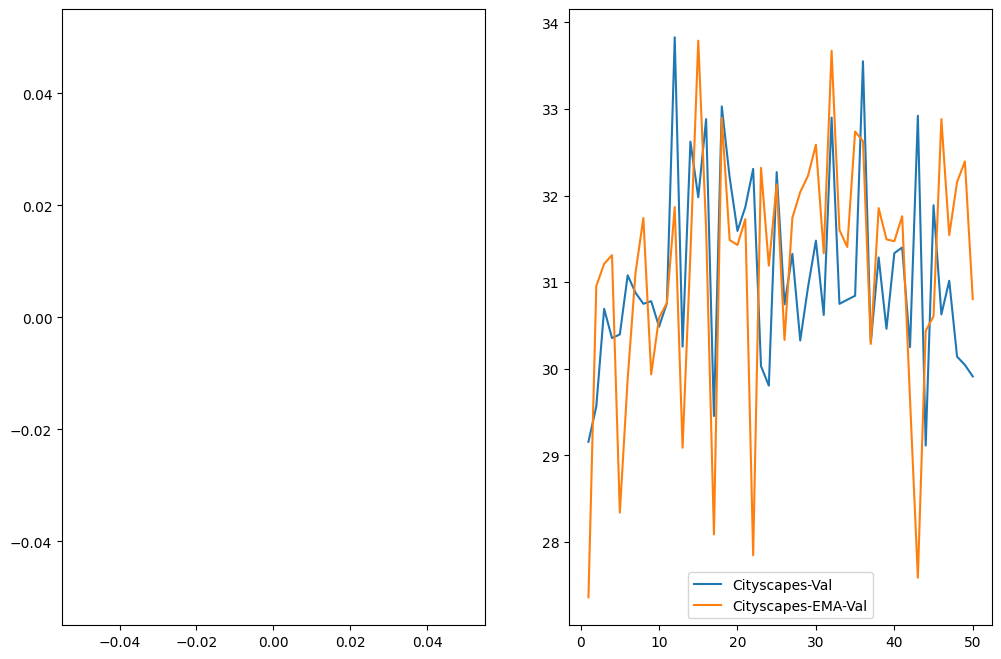

In [135]:
# 50 epochs, lr=1.0e-5!!!, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD
visualize_scores('logs/log_deeplab_wa_0999_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_AdamW_accelerated.txt', print_means=True)

Cityscapes-val-mean-IoU: 25.87707
Cityscapes-val-mean-IoU: 27.263216200000002
Cityscapes-val-mean-IoU: 27.4112214
Cityscapes-val-mean-IoU: 28.268934800000004
Cityscapes-val-mean-IoU: 31.4240926
Cityscapes-val-mean-IoU: 31.4877692
Cityscapes-val-mean-IoU: 28.966621800000002
Cityscapes-val-mean-IoU: 30.8075992
Cityscapes-val-mean-IoU: 28.724389199999997
Cityscapes-val-mean-IoU: 30.4532188
Cityscapes-val-mean-IoU: 31.952955200000005
Cityscapes-val-mean-IoU: 29.7129124
Cityscapes-val-mean-IoU: 28.3261052
Cityscapes-val-mean-IoU: 32.20722
Cityscapes-val-mean-IoU: 31.621195
Cityscapes-val-mean-IoU: 29.645822799999998
Cityscapes-val-mean-IoU: 31.665206599999998
Cityscapes-val-mean-IoU: 30.4114788
Cityscapes-val-mean-IoU: 30.8014496
Cityscapes-val-mean-IoU: 32.1952604
Cityscapes-val-mean-IoU: 29.7878188
Cityscapes-val-mean-IoU: 30.911985400000002
Cityscapes-val-mean-IoU: 31.961660000000002
Cityscapes-val-mean-IoU: 30.599920400000002
Cityscapes-val-mean-IoU: 26.763326999999997
Cityscapes-val-me

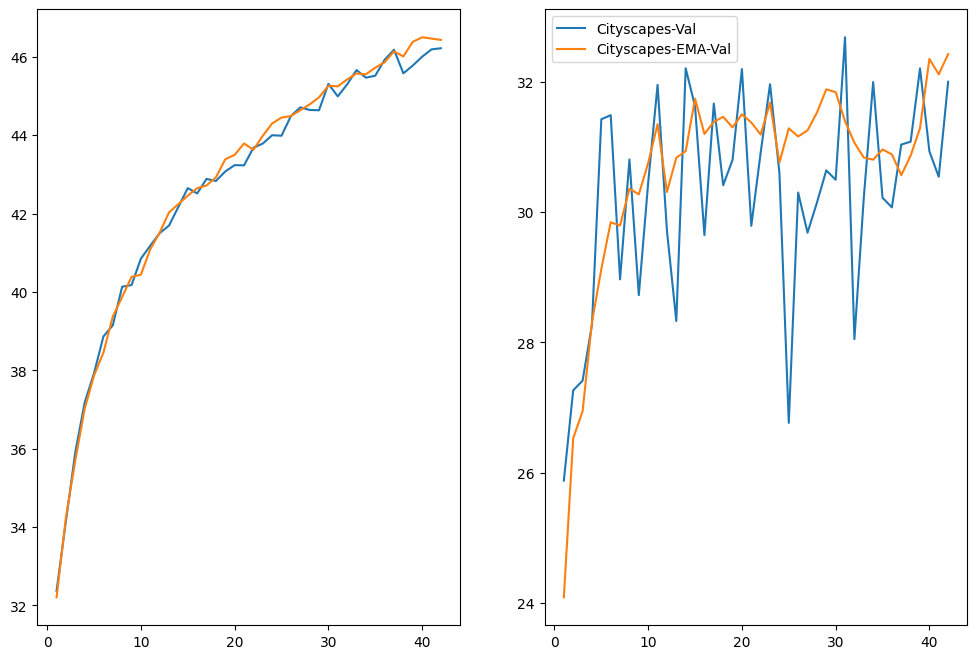

In [283]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD, SegFormer
visualize_scores('logs/log_segformer_wa_999_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_SGD_huggingface_pretrained.txt', print_means=True)

In [186]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD, SegFormer
# visualize_scores('logs/log_deeplab_batch_4_randomBrightnessContrast50PercentCrop_SGD_16_classes.txt', print_means=True)

Cityscapes-val-mean-IoU: 38.472903599999995
Cityscapes-val-mean-IoU: 39.8301462
Cityscapes-val-mean-IoU: 39.8894418
Cityscapes-val-mean-IoU: 40.3359578
Cityscapes-val-mean-IoU: 40.9374312
Cityscapes-val-mean-IoU: 41.214938800000006
Cityscapes-val-mean-IoU: 41.539857
Cityscapes-val-mean-IoU: 40.050337400000004
Cityscapes-val-mean-IoU: 39.5111066
Cityscapes-val-mean-IoU: 41.7975488
Cityscapes-val-mean-IoU: 40.772631800000006
Cityscapes-val-mean-IoU: 42.1747408
Cityscapes-val-mean-IoU: 40.658262
Cityscapes-val-mean-IoU: 41.9478462
Cityscapes-val-mean-IoU: 42.0066144
Cityscapes-val-mean-IoU: 41.8112128
Cityscapes-val-mean-IoU: 40.922902400000005
Cityscapes-val-mean-IoU: 41.8269252
Cityscapes-val-mean-IoU: 43.339494200000004
Cityscapes-val-mean-IoU: 42.7115996
Cityscapes-val-mean-IoU: 43.056571
Cityscapes-val-mean-IoU: 41.9634256
Cityscapes-val-mean-IoU: 42.3147052
Cityscapes-val-mean-IoU: 43.10038839999999
Cityscapes-val-mean-IoU: 42.739613
Cityscapes-val-mean-IoU: 42.774066999999995
Citys

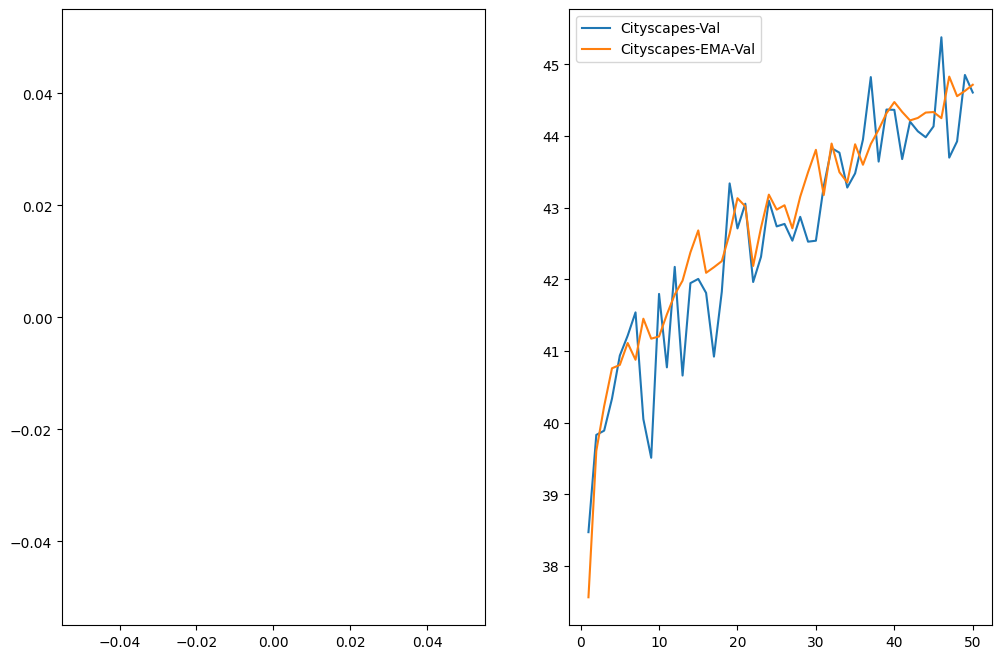

In [281]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD, SegFormer
visualize_scores('logs/log_deeplab_wa_0999_batch_4_lr_1e0-3_randomBrightness50PercentContrastCrop_AdamW_16_classes_segformer_b5_huggingface_pretrained.txt', print_means=True)

Cityscapes-val-mean-IoU: 36.935071199999996
Cityscapes-val-mean-IoU: 33.6607332
Cityscapes-val-mean-IoU: 35.585865600000005
Cityscapes-val-mean-IoU: 40.9626234
Cityscapes-val-mean-IoU: 38.102702400000005
Cityscapes-val-mean-IoU: 38.5643714
Cityscapes-val-mean-IoU: 41.9075504
Cityscapes-val-mean-IoU: 39.117656800000006
Cityscapes-val-mean-IoU: 40.7078816
Cityscapes-val-mean-IoU: 38.8603772
Cityscapes-val-mean-IoU: 40.182476199999996
Cityscapes-val-mean-IoU: 39.32843
Cityscapes-val-mean-IoU: 39.7987516
Cityscapes-val-mean-IoU: 39.8222874
Cityscapes-val-mean-IoU: 40.4394534
Cityscapes-val-mean-IoU: 40.075866
Cityscapes-val-mean-IoU: 37.795722
Cityscapes-val-mean-IoU: 41.043058599999995
Cityscapes-val-mean-IoU: 39.4538098
Cityscapes-val-mean-IoU: 37.191693
Cityscapes-val-mean-IoU: 39.1880124
Cityscapes-val-mean-IoU: 39.52964
Cityscapes-val-mean-IoU: 39.300148400000005
Cityscapes-val-mean-IoU: 40.765844
Cityscapes-val-mean-IoU: 38.320590200000005
Cityscapes-val-mean-IoU: 40.98187360000001
C

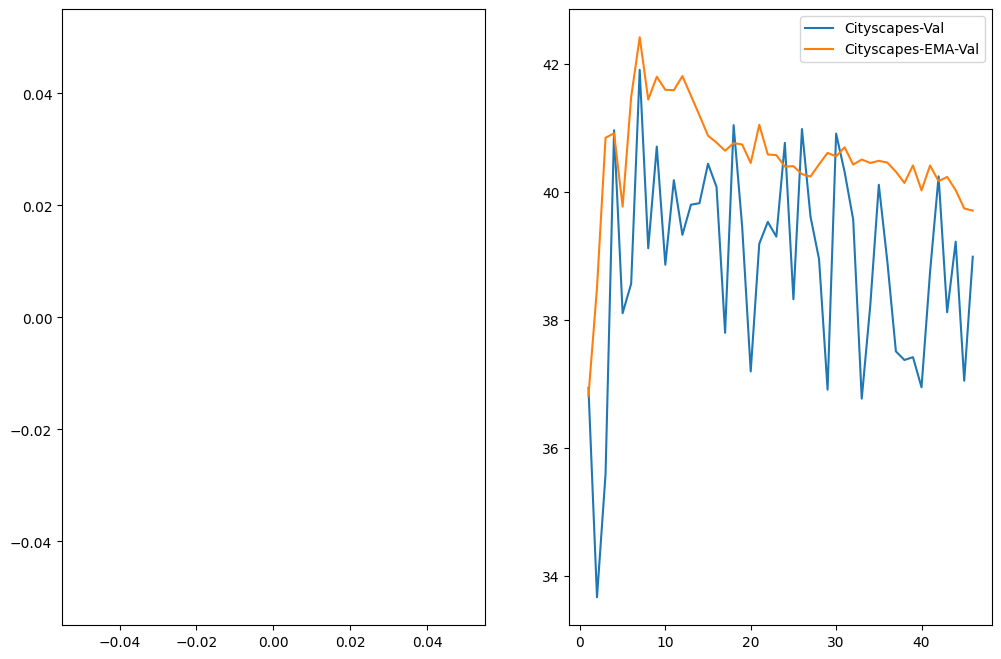

In [285]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, AdamW, SegFormer
visualize_scores('logs/log_wa_0999_batch_4_lr_5e0-5_randomBrightness50PercentContrastCrop_AdamW_16_classes_segformer_b5_huggingface_pretrained.txt', print_means=True)

Cityscapes-val-mean-IoU: 38.4468822
Cityscapes-val-mean-IoU: 34.95812480000001
Cityscapes-val-mean-IoU: 40.26915339999999
Cityscapes-val-mean-IoU: 40.239339
Cityscapes-val-mean-IoU: 42.752857000000006
Cityscapes-val-mean-IoU: 41.543491200000005
Cityscapes-val-mean-IoU: 42.92283880000001
Cityscapes-val-mean-IoU: 43.0855328
Cityscapes-val-mean-IoU: 44.5267828
Cityscapes-val-mean-IoU: 40.673139
Cityscapes-val-mean-IoU: 42.8029582
Cityscapes-val-mean-IoU: 44.630058600000005
Cityscapes-val-mean-IoU: 42.7717134
Cityscapes-val-mean-IoU: 42.6573864
Cityscapes-val-mean-IoU: 43.958646599999994
Cityscapes-val-mean-IoU: 43.1715876
Cityscapes-val-mean-IoU: 44.1083848
Cityscapes-val-mean-IoU: 42.1624602
Cityscapes-val-mean-IoU: 41.2361838
Cityscapes-val-mean-IoU: 44.30378819999999
Cityscapes-val-mean-IoU: 43.8349012
Cityscapes-val-mean-IoU: 43.526640400000005
Cityscapes-val-mean-IoU: 42.198252200000006
Cityscapes-val-mean-IoU: 42.1246656
Cityscapes-val-mean-IoU: 41.3990996
Cityscapes-val-mean-IoU: 4

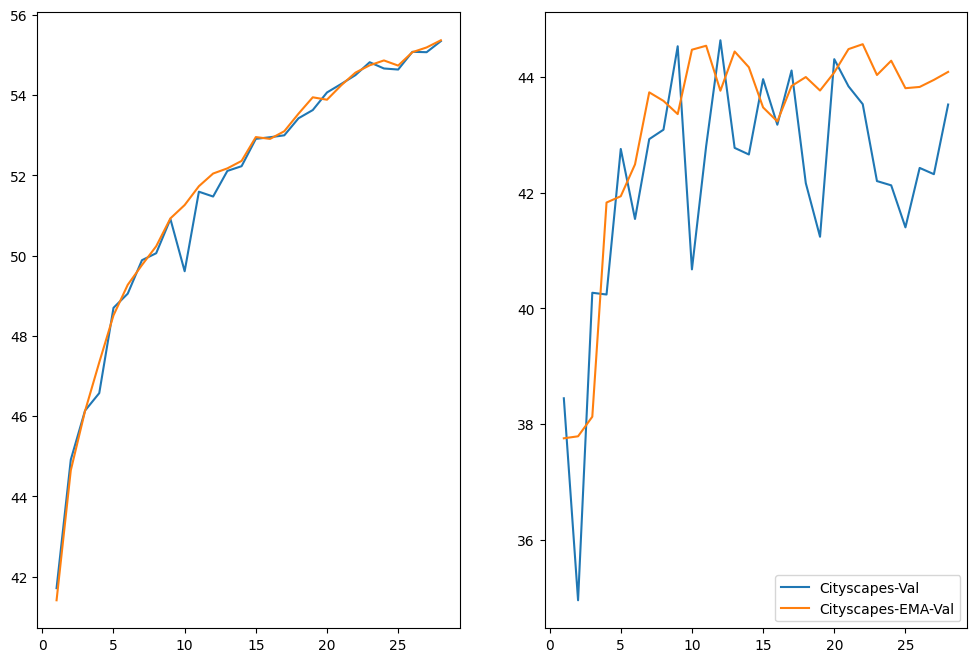

In [276]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD, SegFormer
visualize_scores('logs/log_segformer_wa_999_batch_4_lr_5e0-3_randomBrightness50PercentContrastCrop_SGD_huggingface_pretrained.txt', print_means=True)

Cityscapes-val-mean-IoU: 34.651972199999996
Cityscapes-val-EMA-mean-IoU: 34.6745058


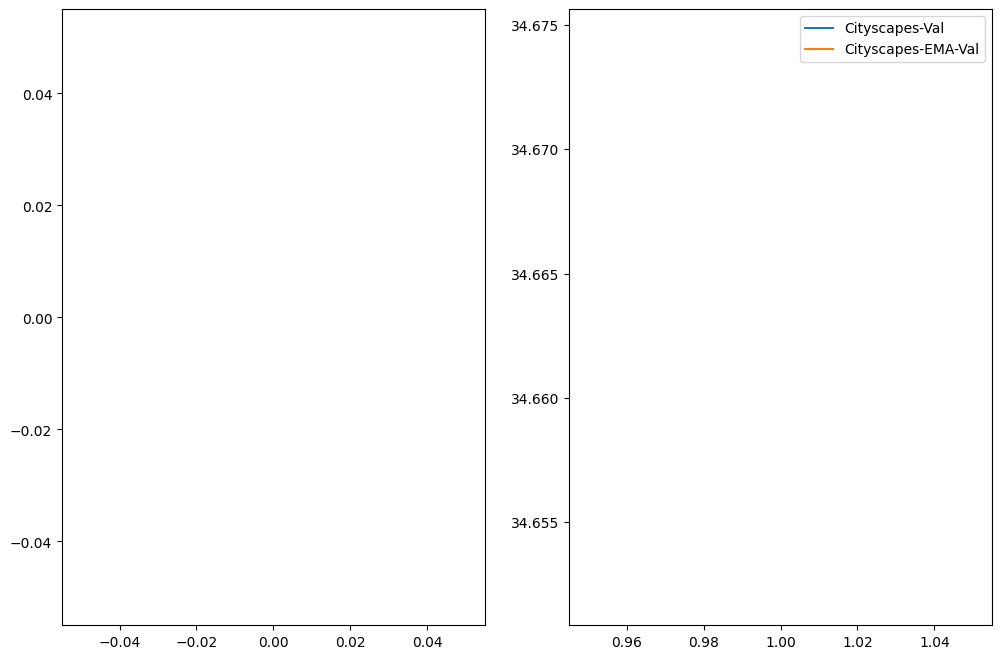

In [286]:
# 50 epochs, lr=1.0e-3, decay fadctor 0.999, batch 4, weight decay = 0, randomCrop, SGD, SegFormer
visualize_scores('logs/log_segformer_wa_999_batch_4_lr_1e0-5_randomBrightness50PercentContrastCrop_AdamW_huggingface_pretrained.txt', print_means=True)